In [112]:
import pandas as pd

from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

from pmdarima import auto_arima

In [4]:
# Cargar el dataset
df = pd.read_csv("processed\data_processed_final.csv")

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\oscac\AppData\Local\Temp\ipykernel_31376\4090716979.py:2: SyntaxWarning: invalid escape sequence '\d'
  df = pd.read_csv("processed\data_processed_final.csv")


In [ ]:
# Calcular los indices en los que el last_performance cambia
def calculate_change_indices(df):
    change_indices = []
    for i in range(1, len(df)):
        if df.iloc[i]['last_performance'] != df.iloc[i-1]['last_performance']:
            change_indices.append(i)
    return change_indices

calculate_change_indices(df[df['Player'] == 'Griezmann'])

45

6 14


c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\st

8
[3.451360585513066, 3.4513493468727443, 3.451339819457432, 3.451332003262391, 3.451325898283665, 3.451321504518216, 3.4513130173723368, 3.45129743227269]


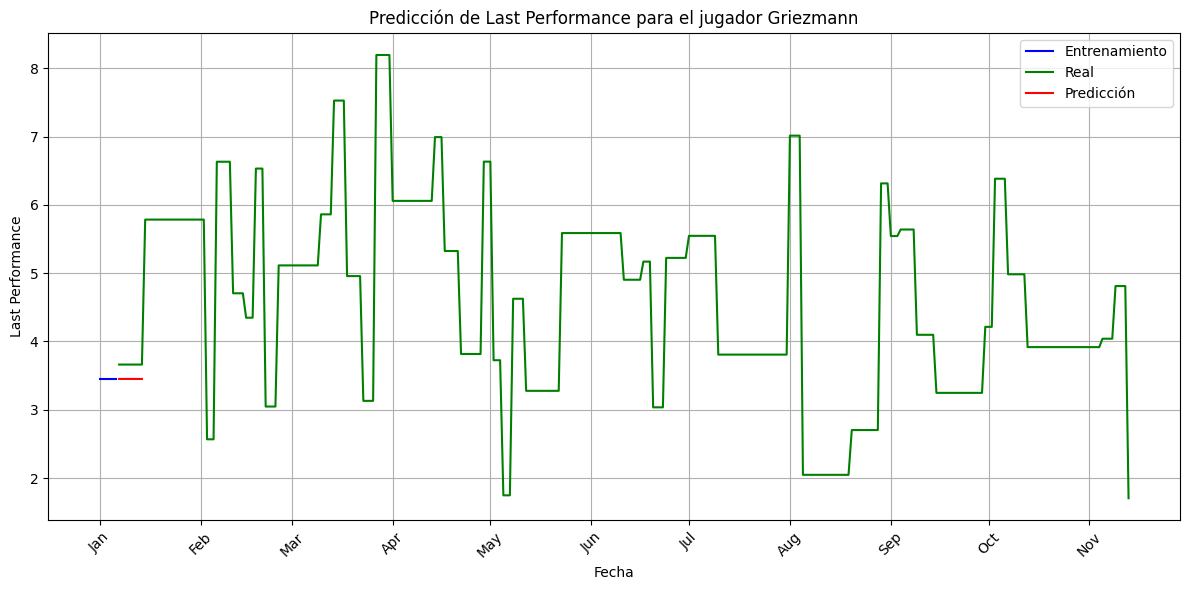

14 33


c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\st

27
[3.451360585513066, 3.4513493468727443, 3.451339819457432, 3.451332003262391, 3.451325898283665, 3.451321504518216, 3.4513130173723368, 3.45129743227269, 3.6613799153322453, 3.6607549926077154, 3.6601357697359846, 3.65952223045872, 3.8689494614510926, 3.8683472411842903, 3.8677506566306747, 3.8671596921263034, 3.866574332154815, 3.865994561347002, 3.8653793324421266, 3.8645722626216323, 3.8630311731020774, 3.861294908799374, 3.859570013179519, 3.857856440953627, 4.065252045330334, 4.063560985213799, 4.061881114403734]


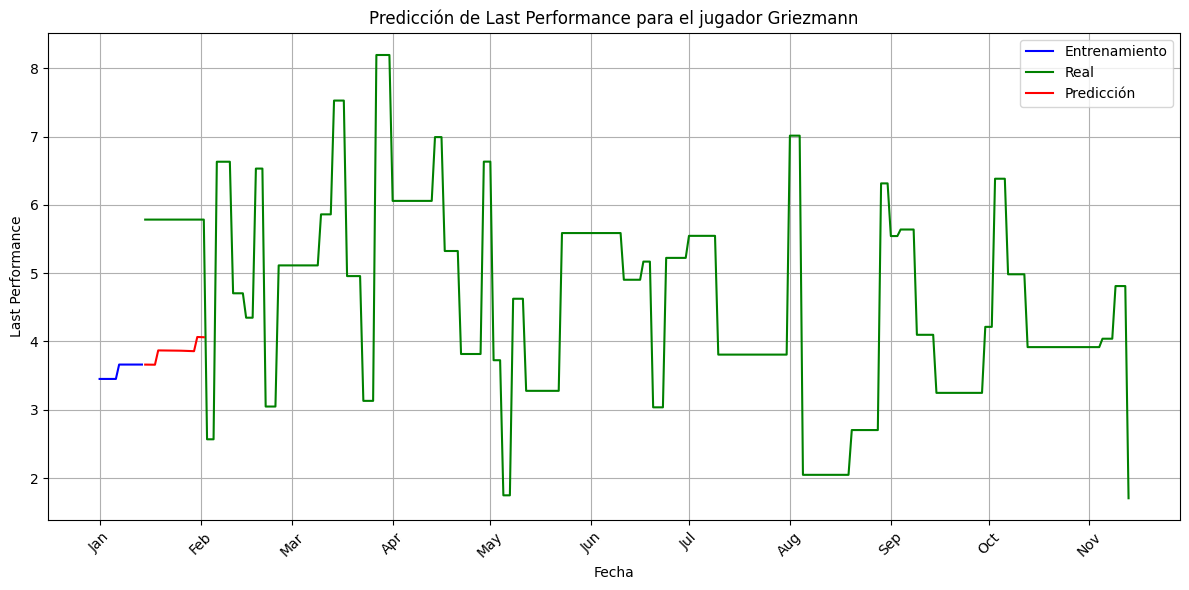

33 36


c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\st

30
[3.451360585513066, 3.4513493468727443, 3.451339819457432, 3.451332003262391, 3.451325898283665, 3.451321504518216, 3.4513130173723368, 3.45129743227269, 3.6613799153322453, 3.6607549926077154, 3.6601357697359846, 3.65952223045872, 3.8689494614510926, 3.8683472411842903, 3.8677506566306747, 3.8671596921263034, 3.866574332154815, 3.865994561347002, 3.8653793324421266, 3.8645722626216323, 3.8630311731020774, 3.861294908799374, 3.859570013179519, 3.857856440953627, 4.065252045330334, 4.063560985213799, 4.061881114403734, 5.7663892973375654, 5.74904615929034, 5.731749658218029]


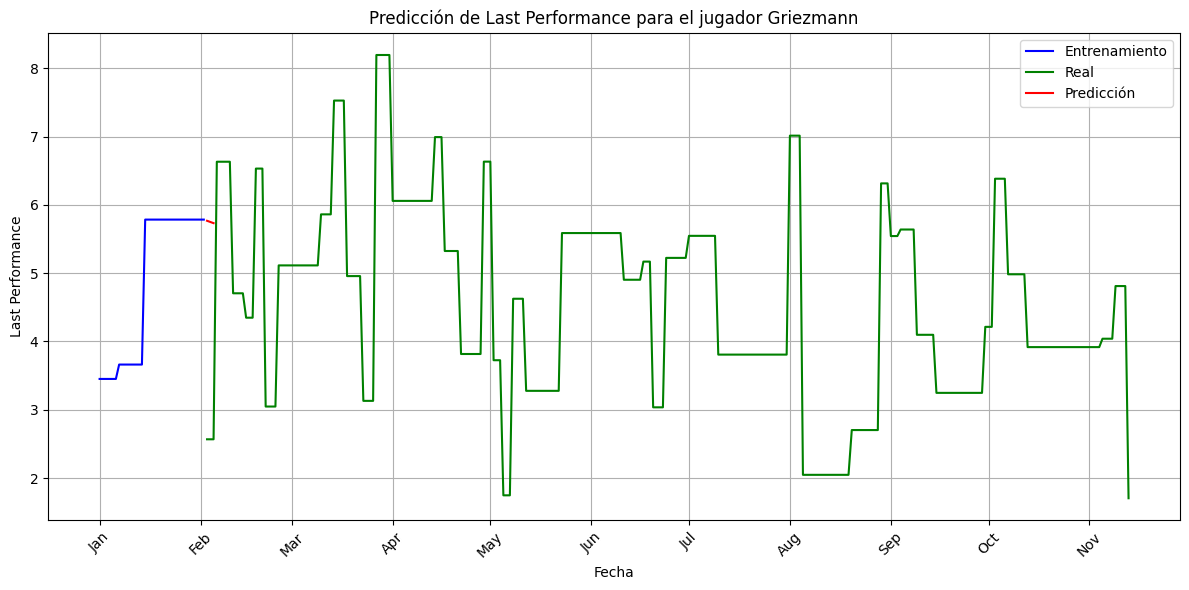

36 41


c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\oscac\AppData\Local\Programs\Python\Pyt

35
[3.451360585513066, 3.4513493468727443, 3.451339819457432, 3.451332003262391, 3.451325898283665, 3.451321504518216, 3.4513130173723368, 3.45129743227269, 3.6613799153322453, 3.6607549926077154, 3.6601357697359846, 3.65952223045872, 3.8689494614510926, 3.8683472411842903, 3.8677506566306747, 3.8671596921263034, 3.866574332154815, 3.865994561347002, 3.8653793324421266, 3.8645722626216323, 3.8630311731020774, 3.861294908799374, 3.859570013179519, 3.857856440953627, 4.065252045330334, 4.063560985213799, 4.061881114403734, 5.7663892973375654, 5.74904615929034, 5.731749658218029, 2.5401208361527643, 2.5114955013288784, 2.547296699775564, 2.5201328134785035, 2.4936854159575197]


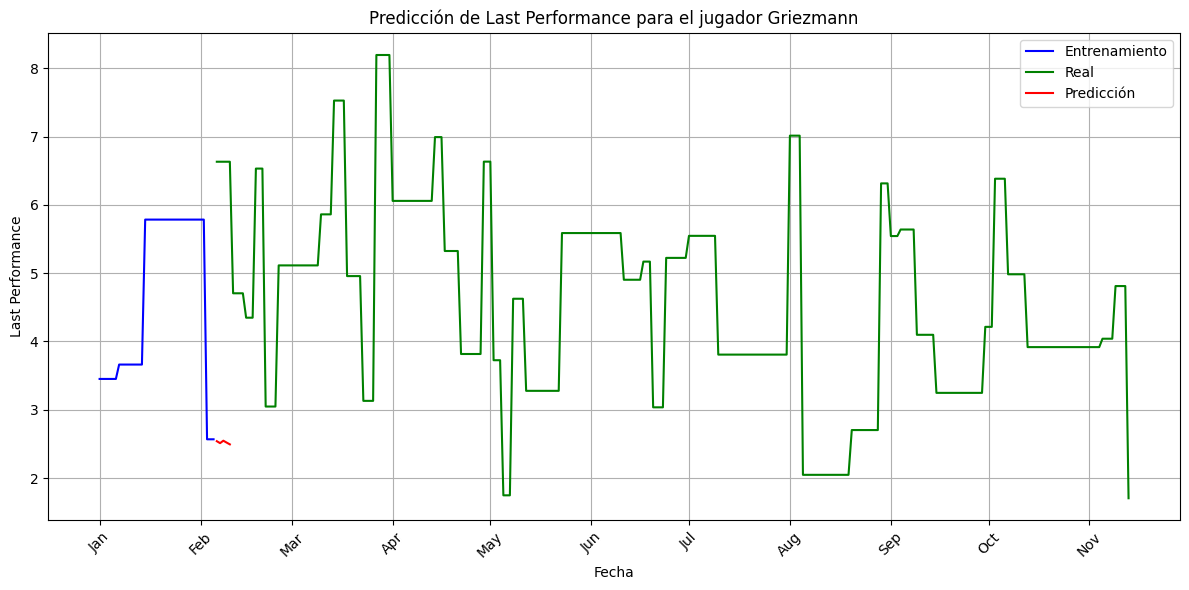

41 45


c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\st

39
[3.451360585513066, 3.4513493468727443, 3.451339819457432, 3.451332003262391, 3.451325898283665, 3.451321504518216, 3.4513130173723368, 3.45129743227269, 3.6613799153322453, 3.6607549926077154, 3.6601357697359846, 3.65952223045872, 3.8689494614510926, 3.8683472411842903, 3.8677506566306747, 3.8671596921263034, 3.866574332154815, 3.865994561347002, 3.8653793324421266, 3.8645722626216323, 3.8630311731020774, 3.861294908799374, 3.859570013179519, 3.857856440953627, 4.065252045330334, 4.063560985213799, 4.061881114403734, 5.7663892973375654, 5.74904615929034, 5.731749658218029, 2.5401208361527643, 2.5114955013288784, 2.547296699775564, 2.5201328134785035, 2.4936854159575197, 6.515876951887925, 6.413395776113636, 6.302677758109548, 6.194665072737073]


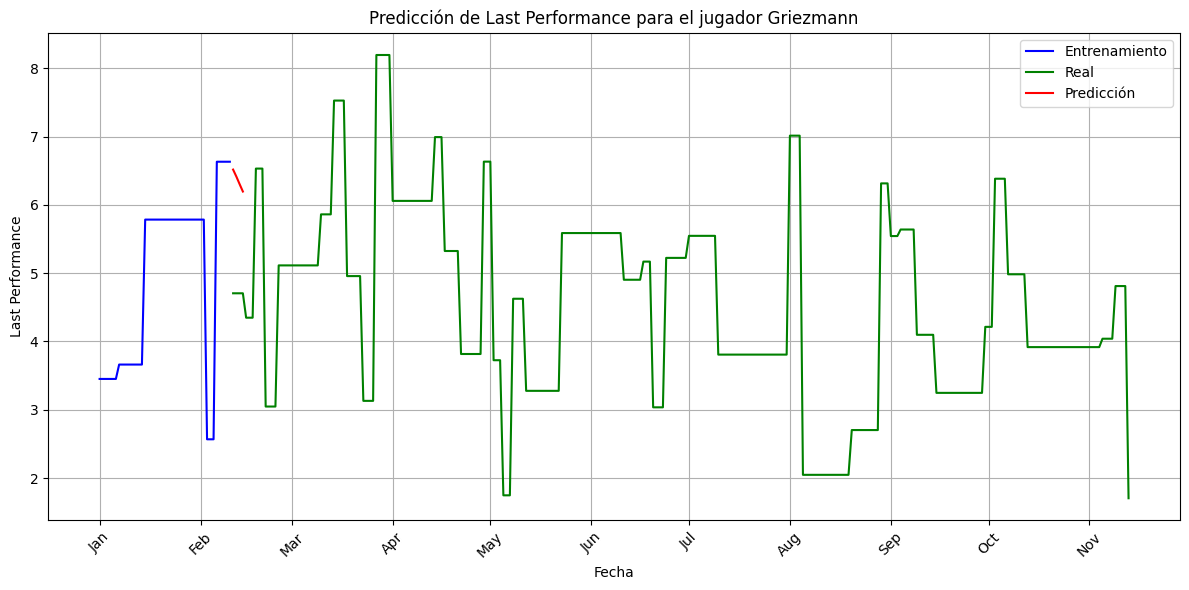

45 48


c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.p

42
[3.451360585513066, 3.4513493468727443, 3.451339819457432, 3.451332003262391, 3.451325898283665, 3.451321504518216, 3.4513130173723368, 3.45129743227269, 3.6613799153322453, 3.6607549926077154, 3.6601357697359846, 3.65952223045872, 3.8689494614510926, 3.8683472411842903, 3.8677506566306747, 3.8671596921263034, 3.866574332154815, 3.865994561347002, 3.8653793324421266, 3.8645722626216323, 3.8630311731020774, 3.861294908799374, 3.859570013179519, 3.857856440953627, 4.065252045330334, 4.063560985213799, 4.061881114403734, 5.7663892973375654, 5.74904615929034, 5.731749658218029, 2.5401208361527643, 2.5114955013288784, 2.547296699775564, 2.5201328134785035, 2.4936854159575197, 6.515876951887925, 6.413395776113636, 6.302677758109548, 6.194665072737073, 4.406047918267783, 4.320396148601968, 4.237717381516678]


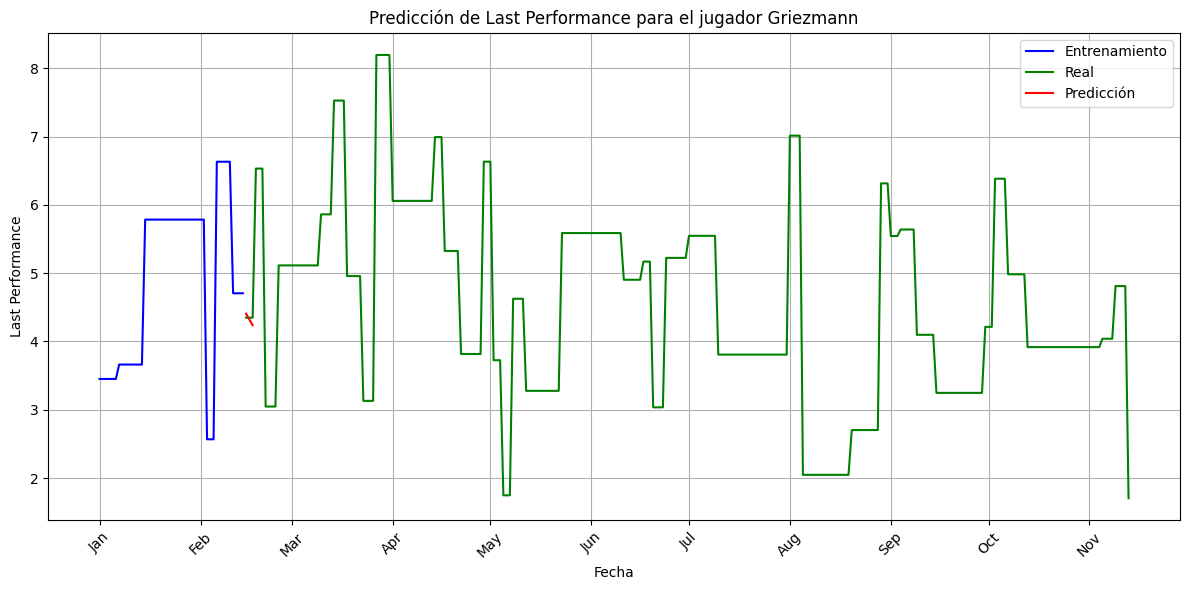

48 51


c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_mod

45
[3.451360585513066, 3.4513493468727443, 3.451339819457432, 3.451332003262391, 3.451325898283665, 3.451321504518216, 3.4513130173723368, 3.45129743227269, 3.6613799153322453, 3.6607549926077154, 3.6601357697359846, 3.65952223045872, 3.8689494614510926, 3.8683472411842903, 3.8677506566306747, 3.8671596921263034, 3.866574332154815, 3.865994561347002, 3.8653793324421266, 3.8645722626216323, 3.8630311731020774, 3.861294908799374, 3.859570013179519, 3.857856440953627, 4.065252045330334, 4.063560985213799, 4.061881114403734, 5.7663892973375654, 5.74904615929034, 5.731749658218029, 2.5401208361527643, 2.5114955013288784, 2.547296699775564, 2.5201328134785035, 2.4936854159575197, 6.515876951887925, 6.413395776113636, 6.302677758109548, 6.194665072737073, 4.406047918267783, 4.320396148601968, 4.237717381516678, 4.563962746533042, 4.483701146144987, 4.549499570350188]


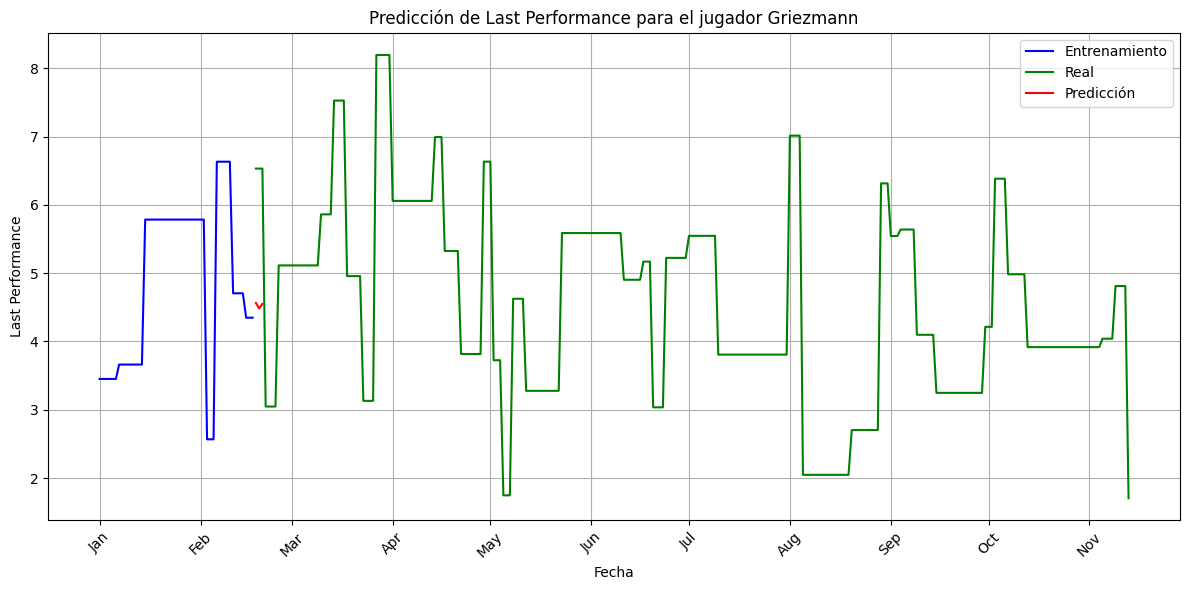

51 55


c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sa

49
[3.451360585513066, 3.4513493468727443, 3.451339819457432, 3.451332003262391, 3.451325898283665, 3.451321504518216, 3.4513130173723368, 3.45129743227269, 3.6613799153322453, 3.6607549926077154, 3.6601357697359846, 3.65952223045872, 3.8689494614510926, 3.8683472411842903, 3.8677506566306747, 3.8671596921263034, 3.866574332154815, 3.865994561347002, 3.8653793324421266, 3.8645722626216323, 3.8630311731020774, 3.861294908799374, 3.859570013179519, 3.857856440953627, 4.065252045330334, 4.063560985213799, 4.061881114403734, 5.7663892973375654, 5.74904615929034, 5.731749658218029, 2.5401208361527643, 2.5114955013288784, 2.547296699775564, 2.5201328134785035, 2.4936854159575197, 6.515876951887925, 6.413395776113636, 6.302677758109548, 6.194665072737073, 4.406047918267783, 4.320396148601968, 4.237717381516678, 4.563962746533042, 4.483701146144987, 4.549499570350188, 6.406279584015205, 6.283709254022633, 5.655760536612982, 5.539765355489754]


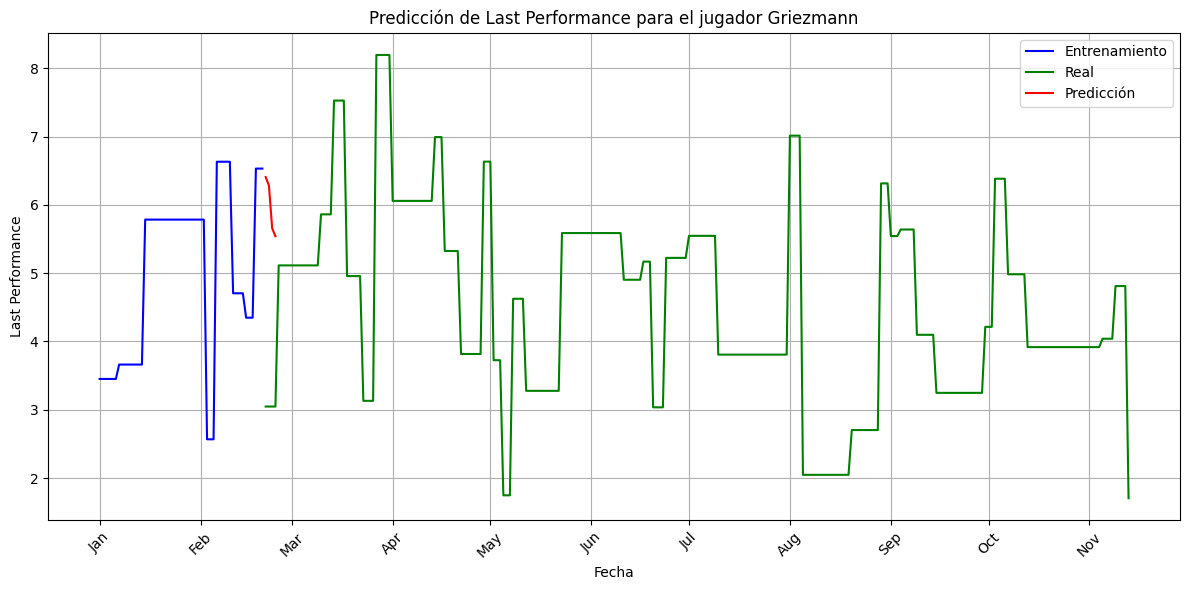

55 68


c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.p

62
[3.451360585513066, 3.4513493468727443, 3.451339819457432, 3.451332003262391, 3.451325898283665, 3.451321504518216, 3.4513130173723368, 3.45129743227269, 3.6613799153322453, 3.6607549926077154, 3.6601357697359846, 3.65952223045872, 3.8689494614510926, 3.8683472411842903, 3.8677506566306747, 3.8671596921263034, 3.866574332154815, 3.865994561347002, 3.8653793324421266, 3.8645722626216323, 3.8630311731020774, 3.861294908799374, 3.859570013179519, 3.857856440953627, 4.065252045330334, 4.063560985213799, 4.061881114403734, 5.7663892973375654, 5.74904615929034, 5.731749658218029, 2.5401208361527643, 2.5114955013288784, 2.547296699775564, 2.5201328134785035, 2.4936854159575197, 6.515876951887925, 6.413395776113636, 6.302677758109548, 6.194665072737073, 4.406047918267783, 4.320396148601968, 4.237717381516678, 4.563962746533042, 4.483701146144987, 4.549499570350188, 6.406279584015205, 6.283709254022633, 5.655760536612982, 5.539765355489754, 5.175714742295341, 5.063954238555157, 4.80358554202

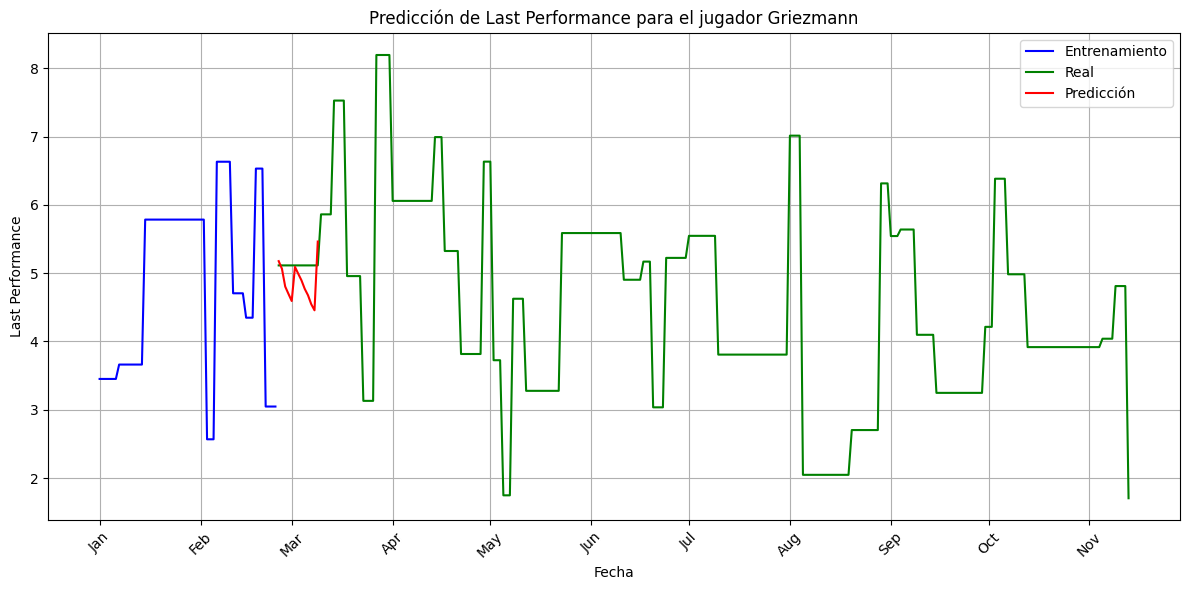

68 72


c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: Value

66
[3.451360585513066, 3.4513493468727443, 3.451339819457432, 3.451332003262391, 3.451325898283665, 3.451321504518216, 3.4513130173723368, 3.45129743227269, 3.6613799153322453, 3.6607549926077154, 3.6601357697359846, 3.65952223045872, 3.8689494614510926, 3.8683472411842903, 3.8677506566306747, 3.8671596921263034, 3.866574332154815, 3.865994561347002, 3.8653793324421266, 3.8645722626216323, 3.8630311731020774, 3.861294908799374, 3.859570013179519, 3.857856440953627, 4.065252045330334, 4.063560985213799, 4.061881114403734, 5.7663892973375654, 5.74904615929034, 5.731749658218029, 2.5401208361527643, 2.5114955013288784, 2.547296699775564, 2.5201328134785035, 2.4936854159575197, 6.515876951887925, 6.413395776113636, 6.302677758109548, 6.194665072737073, 4.406047918267783, 4.320396148601968, 4.237717381516678, 4.563962746533042, 4.483701146144987, 4.549499570350188, 6.406279584015205, 6.283709254022633, 5.655760536612982, 5.539765355489754, 5.175714742295341, 5.063954238555157, 4.80358554202

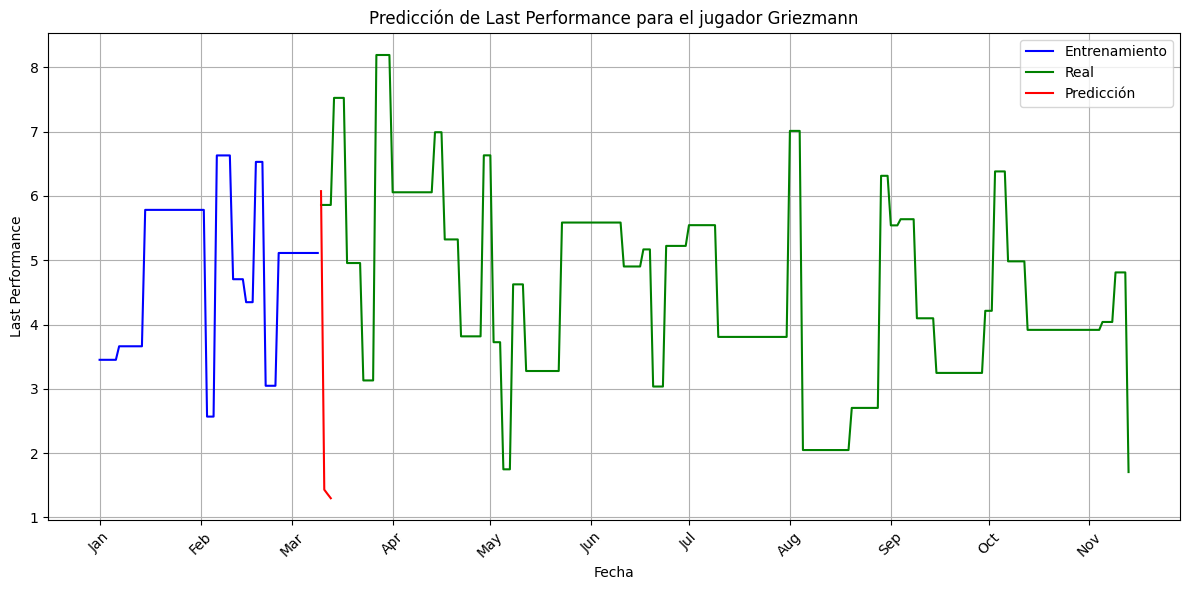

72 76


c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.p

70
[3.451360585513066, 3.4513493468727443, 3.451339819457432, 3.451332003262391, 3.451325898283665, 3.451321504518216, 3.4513130173723368, 3.45129743227269, 3.6613799153322453, 3.6607549926077154, 3.6601357697359846, 3.65952223045872, 3.8689494614510926, 3.8683472411842903, 3.8677506566306747, 3.8671596921263034, 3.866574332154815, 3.865994561347002, 3.8653793324421266, 3.8645722626216323, 3.8630311731020774, 3.861294908799374, 3.859570013179519, 3.857856440953627, 4.065252045330334, 4.063560985213799, 4.061881114403734, 5.7663892973375654, 5.74904615929034, 5.731749658218029, 2.5401208361527643, 2.5114955013288784, 2.547296699775564, 2.5201328134785035, 2.4936854159575197, 6.515876951887925, 6.413395776113636, 6.302677758109548, 6.194665072737073, 4.406047918267783, 4.320396148601968, 4.237717381516678, 4.563962746533042, 4.483701146144987, 4.549499570350188, 6.406279584015205, 6.283709254022633, 5.655760536612982, 5.539765355489754, 5.175714742295341, 5.063954238555157, 4.80358554202

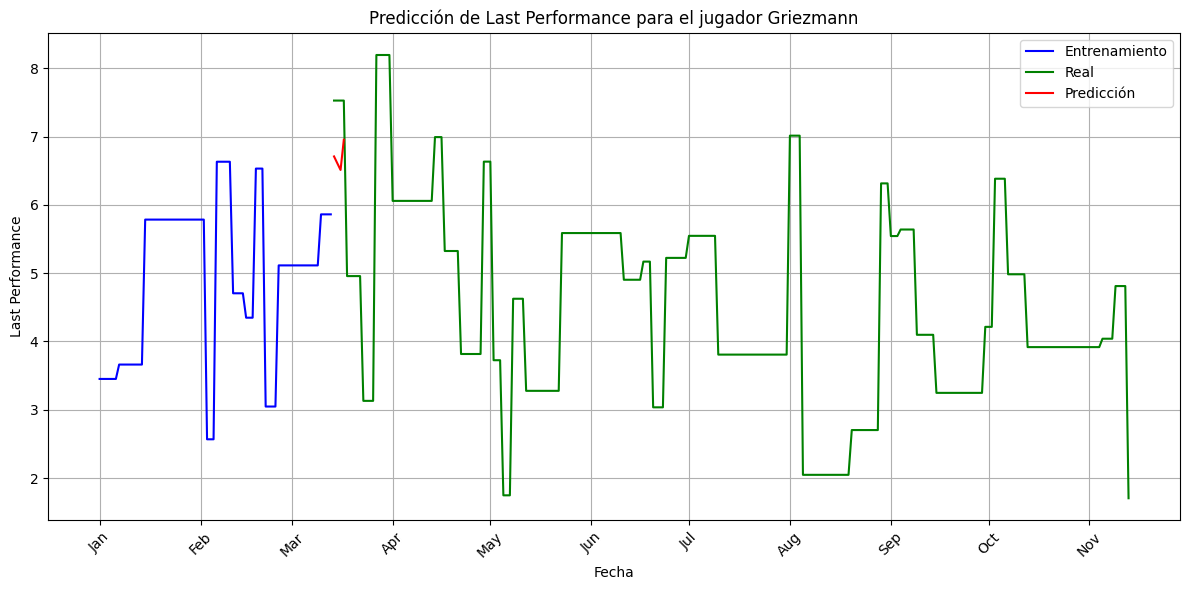

76 81


c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: Value

75
[3.451360585513066, 3.4513493468727443, 3.451339819457432, 3.451332003262391, 3.451325898283665, 3.451321504518216, 3.4513130173723368, 3.45129743227269, 3.6613799153322453, 3.6607549926077154, 3.6601357697359846, 3.65952223045872, 3.8689494614510926, 3.8683472411842903, 3.8677506566306747, 3.8671596921263034, 3.866574332154815, 3.865994561347002, 3.8653793324421266, 3.8645722626216323, 3.8630311731020774, 3.861294908799374, 3.859570013179519, 3.857856440953627, 4.065252045330334, 4.063560985213799, 4.061881114403734, 5.7663892973375654, 5.74904615929034, 5.731749658218029, 2.5401208361527643, 2.5114955013288784, 2.547296699775564, 2.5201328134785035, 2.4936854159575197, 6.515876951887925, 6.413395776113636, 6.302677758109548, 6.194665072737073, 4.406047918267783, 4.320396148601968, 4.237717381516678, 4.563962746533042, 4.483701146144987, 4.549499570350188, 6.406279584015205, 6.283709254022633, 5.655760536612982, 5.539765355489754, 5.175714742295341, 5.063954238555157, 4.80358554202

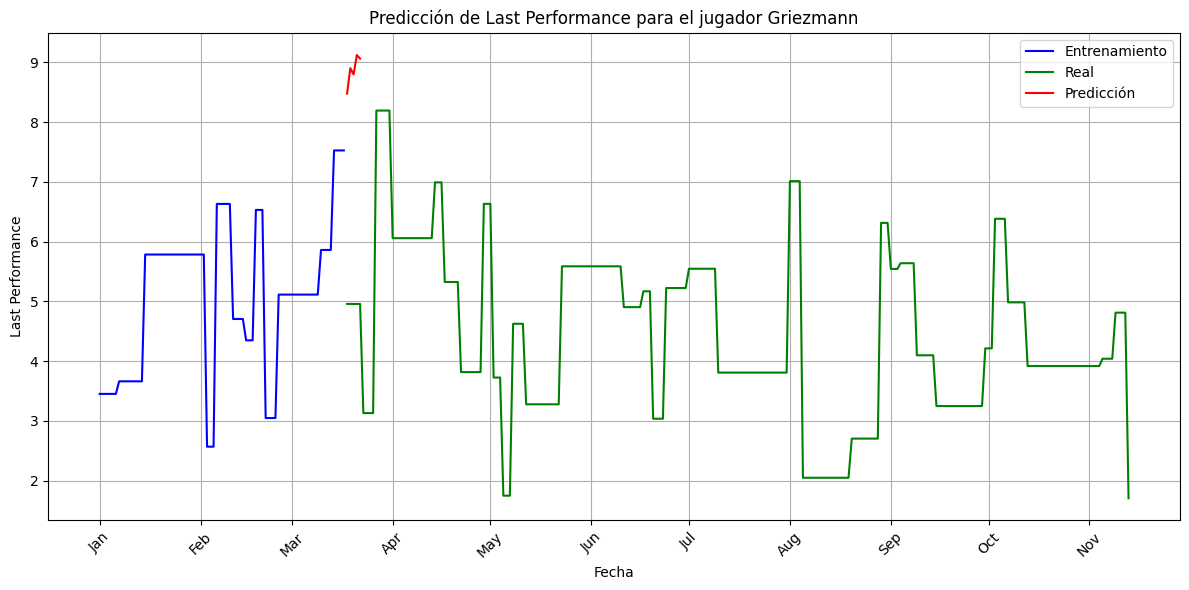

81 85


c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


79
[3.451360585513066, 3.4513493468727443, 3.451339819457432, 3.451332003262391, 3.451325898283665, 3.451321504518216, 3.4513130173723368, 3.45129743227269, 3.6613799153322453, 3.6607549926077154, 3.6601357697359846, 3.65952223045872, 3.8689494614510926, 3.8683472411842903, 3.8677506566306747, 3.8671596921263034, 3.866574332154815, 3.865994561347002, 3.8653793324421266, 3.8645722626216323, 3.8630311731020774, 3.861294908799374, 3.859570013179519, 3.857856440953627, 4.065252045330334, 4.063560985213799, 4.061881114403734, 5.7663892973375654, 5.74904615929034, 5.731749658218029, 2.5401208361527643, 2.5114955013288784, 2.547296699775564, 2.5201328134785035, 2.4936854159575197, 6.515876951887925, 6.413395776113636, 6.302677758109548, 6.194665072737073, 4.406047918267783, 4.320396148601968, 4.237717381516678, 4.563962746533042, 4.483701146144987, 4.549499570350188, 6.406279584015205, 6.283709254022633, 5.655760536612982, 5.539765355489754, 5.175714742295341, 5.063954238555157, 4.80358554202

c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


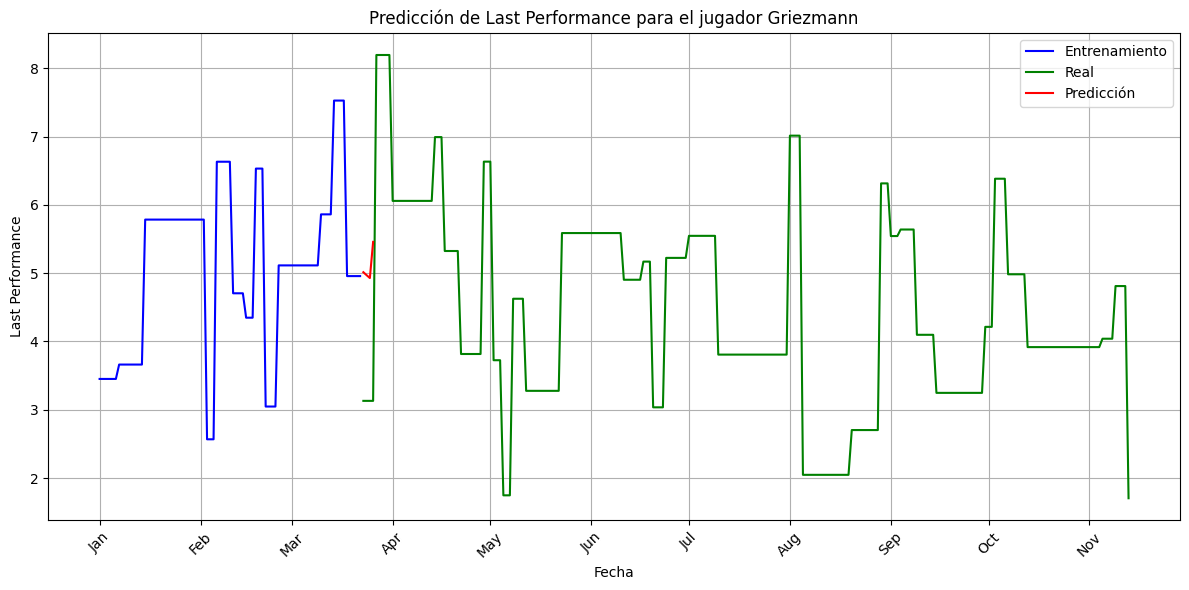

85 90


c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.p

84
[3.451360585513066, 3.4513493468727443, 3.451339819457432, 3.451332003262391, 3.451325898283665, 3.451321504518216, 3.4513130173723368, 3.45129743227269, 3.6613799153322453, 3.6607549926077154, 3.6601357697359846, 3.65952223045872, 3.8689494614510926, 3.8683472411842903, 3.8677506566306747, 3.8671596921263034, 3.866574332154815, 3.865994561347002, 3.8653793324421266, 3.8645722626216323, 3.8630311731020774, 3.861294908799374, 3.859570013179519, 3.857856440953627, 4.065252045330334, 4.063560985213799, 4.061881114403734, 5.7663892973375654, 5.74904615929034, 5.731749658218029, 2.5401208361527643, 2.5114955013288784, 2.547296699775564, 2.5201328134785035, 2.4936854159575197, 6.515876951887925, 6.413395776113636, 6.302677758109548, 6.194665072737073, 4.406047918267783, 4.320396148601968, 4.237717381516678, 4.563962746533042, 4.483701146144987, 4.549499570350188, 6.406279584015205, 6.283709254022633, 5.655760536612982, 5.539765355489754, 5.175714742295341, 5.063954238555157, 4.80358554202

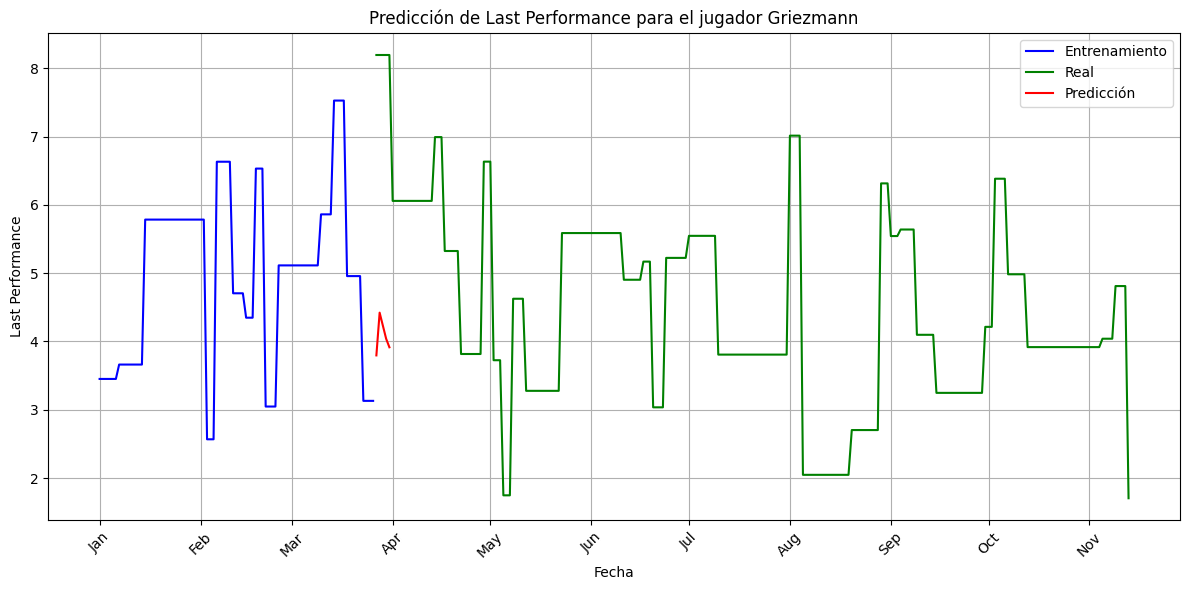

90 103


c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: Value

97
[3.451360585513066, 3.4513493468727443, 3.451339819457432, 3.451332003262391, 3.451325898283665, 3.451321504518216, 3.4513130173723368, 3.45129743227269, 3.6613799153322453, 3.6607549926077154, 3.6601357697359846, 3.65952223045872, 3.8689494614510926, 3.8683472411842903, 3.8677506566306747, 3.8671596921263034, 3.866574332154815, 3.865994561347002, 3.8653793324421266, 3.8645722626216323, 3.8630311731020774, 3.861294908799374, 3.859570013179519, 3.857856440953627, 4.065252045330334, 4.063560985213799, 4.061881114403734, 5.7663892973375654, 5.74904615929034, 5.731749658218029, 2.5401208361527643, 2.5114955013288784, 2.547296699775564, 2.5201328134785035, 2.4936854159575197, 6.515876951887925, 6.413395776113636, 6.302677758109548, 6.194665072737073, 4.406047918267783, 4.320396148601968, 4.237717381516678, 4.563962746533042, 4.483701146144987, 4.549499570350188, 6.406279584015205, 6.283709254022633, 5.655760536612982, 5.539765355489754, 5.175714742295341, 5.063954238555157, 4.80358554202

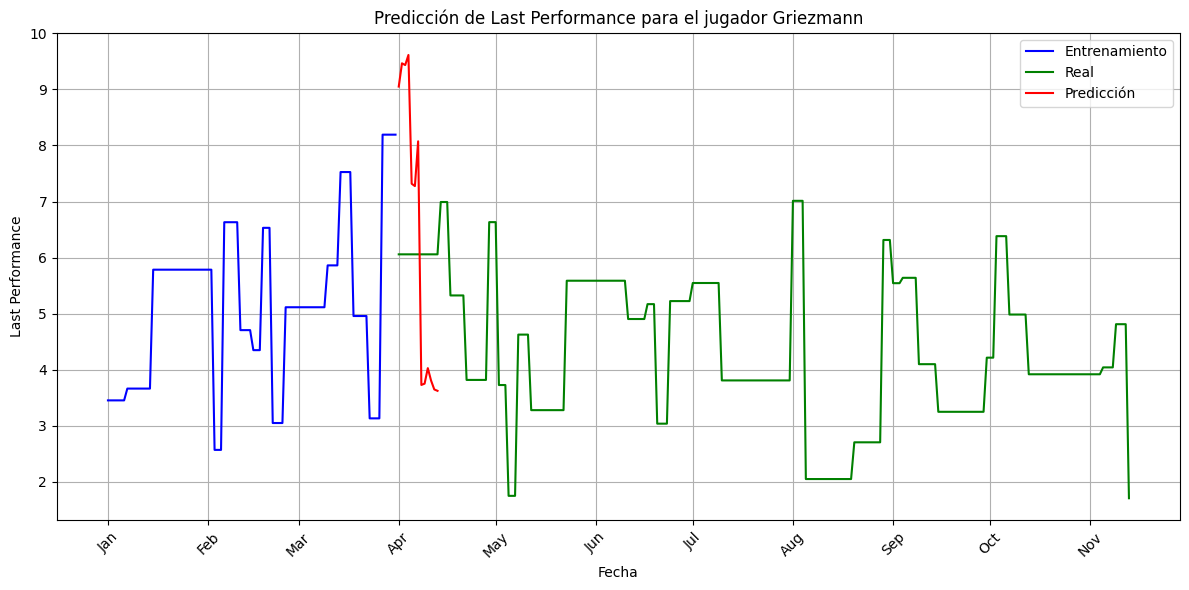

103 106


c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.p

100
[3.451360585513066, 3.4513493468727443, 3.451339819457432, 3.451332003262391, 3.451325898283665, 3.451321504518216, 3.4513130173723368, 3.45129743227269, 3.6613799153322453, 3.6607549926077154, 3.6601357697359846, 3.65952223045872, 3.8689494614510926, 3.8683472411842903, 3.8677506566306747, 3.8671596921263034, 3.866574332154815, 3.865994561347002, 3.8653793324421266, 3.8645722626216323, 3.8630311731020774, 3.861294908799374, 3.859570013179519, 3.857856440953627, 4.065252045330334, 4.063560985213799, 4.061881114403734, 5.7663892973375654, 5.74904615929034, 5.731749658218029, 2.5401208361527643, 2.5114955013288784, 2.547296699775564, 2.5201328134785035, 2.4936854159575197, 6.515876951887925, 6.413395776113636, 6.302677758109548, 6.194665072737073, 4.406047918267783, 4.320396148601968, 4.237717381516678, 4.563962746533042, 4.483701146144987, 4.549499570350188, 6.406279584015205, 6.283709254022633, 5.655760536612982, 5.539765355489754, 5.175714742295341, 5.063954238555157, 4.8035855420

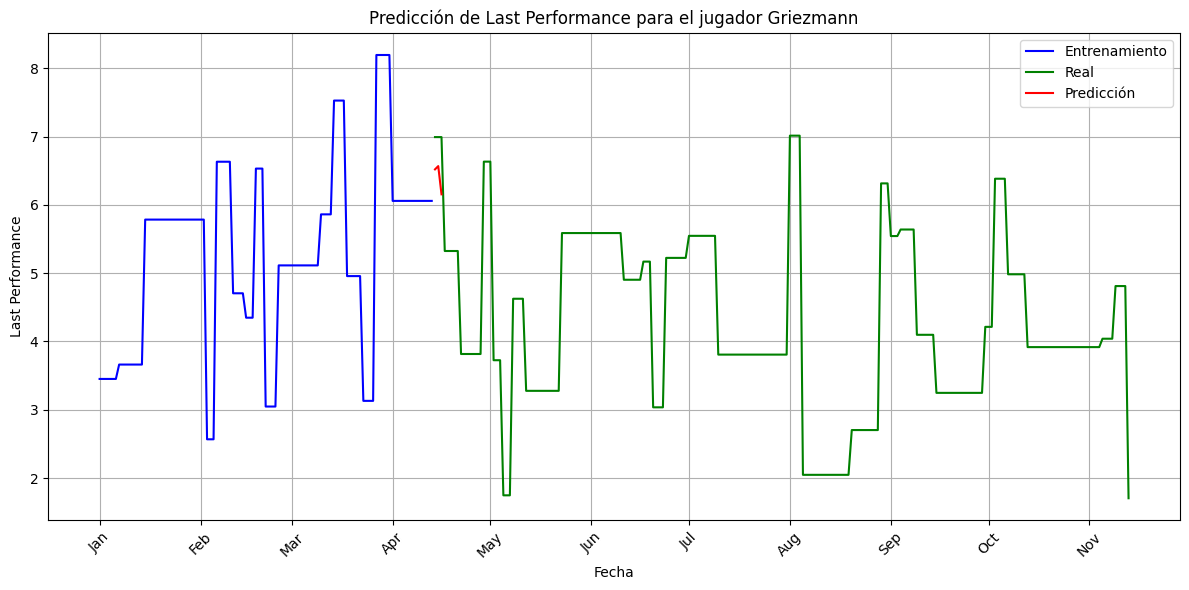

106 111


c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.p

105
[3.451360585513066, 3.4513493468727443, 3.451339819457432, 3.451332003262391, 3.451325898283665, 3.451321504518216, 3.4513130173723368, 3.45129743227269, 3.6613799153322453, 3.6607549926077154, 3.6601357697359846, 3.65952223045872, 3.8689494614510926, 3.8683472411842903, 3.8677506566306747, 3.8671596921263034, 3.866574332154815, 3.865994561347002, 3.8653793324421266, 3.8645722626216323, 3.8630311731020774, 3.861294908799374, 3.859570013179519, 3.857856440953627, 4.065252045330334, 4.063560985213799, 4.061881114403734, 5.7663892973375654, 5.74904615929034, 5.731749658218029, 2.5401208361527643, 2.5114955013288784, 2.547296699775564, 2.5201328134785035, 2.4936854159575197, 6.515876951887925, 6.413395776113636, 6.302677758109548, 6.194665072737073, 4.406047918267783, 4.320396148601968, 4.237717381516678, 4.563962746533042, 4.483701146144987, 4.549499570350188, 6.406279584015205, 6.283709254022633, 5.655760536612982, 5.539765355489754, 5.175714742295341, 5.063954238555157, 4.8035855420

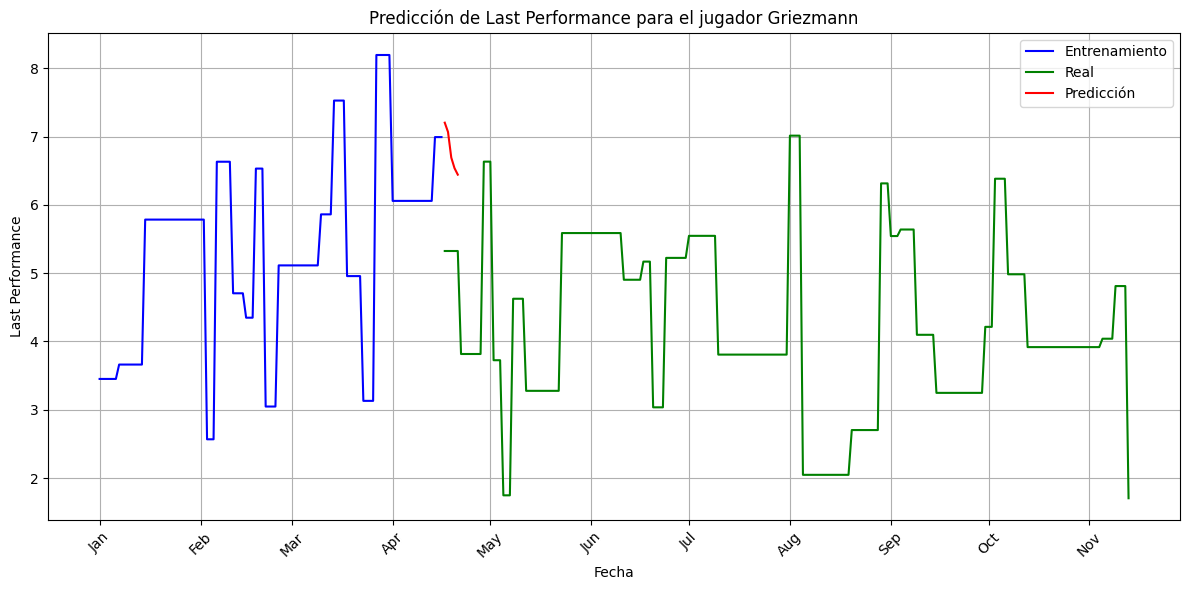

111 118


c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.p

112
[3.451360585513066, 3.4513493468727443, 3.451339819457432, 3.451332003262391, 3.451325898283665, 3.451321504518216, 3.4513130173723368, 3.45129743227269, 3.6613799153322453, 3.6607549926077154, 3.6601357697359846, 3.65952223045872, 3.8689494614510926, 3.8683472411842903, 3.8677506566306747, 3.8671596921263034, 3.866574332154815, 3.865994561347002, 3.8653793324421266, 3.8645722626216323, 3.8630311731020774, 3.861294908799374, 3.859570013179519, 3.857856440953627, 4.065252045330334, 4.063560985213799, 4.061881114403734, 5.7663892973375654, 5.74904615929034, 5.731749658218029, 2.5401208361527643, 2.5114955013288784, 2.547296699775564, 2.5201328134785035, 2.4936854159575197, 6.515876951887925, 6.413395776113636, 6.302677758109548, 6.194665072737073, 4.406047918267783, 4.320396148601968, 4.237717381516678, 4.563962746533042, 4.483701146144987, 4.549499570350188, 6.406279584015205, 6.283709254022633, 5.655760536612982, 5.539765355489754, 5.175714742295341, 5.063954238555157, 4.8035855420

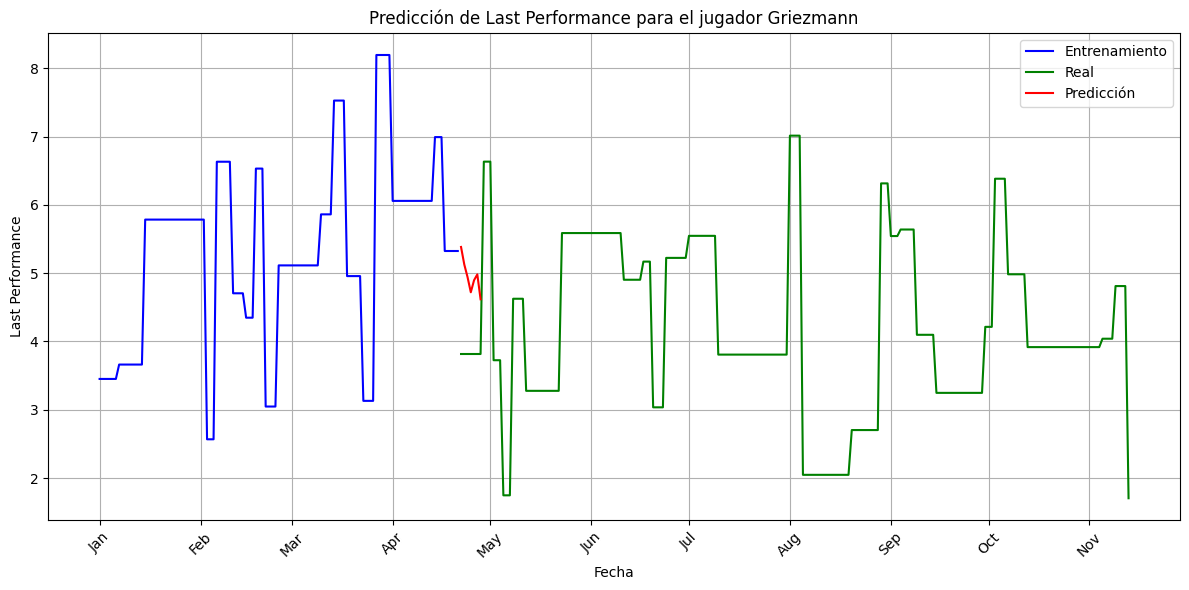

118 121


c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.p

115
[3.451360585513066, 3.4513493468727443, 3.451339819457432, 3.451332003262391, 3.451325898283665, 3.451321504518216, 3.4513130173723368, 3.45129743227269, 3.6613799153322453, 3.6607549926077154, 3.6601357697359846, 3.65952223045872, 3.8689494614510926, 3.8683472411842903, 3.8677506566306747, 3.8671596921263034, 3.866574332154815, 3.865994561347002, 3.8653793324421266, 3.8645722626216323, 3.8630311731020774, 3.861294908799374, 3.859570013179519, 3.857856440953627, 4.065252045330334, 4.063560985213799, 4.061881114403734, 5.7663892973375654, 5.74904615929034, 5.731749658218029, 2.5401208361527643, 2.5114955013288784, 2.547296699775564, 2.5201328134785035, 2.4936854159575197, 6.515876951887925, 6.413395776113636, 6.302677758109548, 6.194665072737073, 4.406047918267783, 4.320396148601968, 4.237717381516678, 4.563962746533042, 4.483701146144987, 4.549499570350188, 6.406279584015205, 6.283709254022633, 5.655760536612982, 5.539765355489754, 5.175714742295341, 5.063954238555157, 4.8035855420

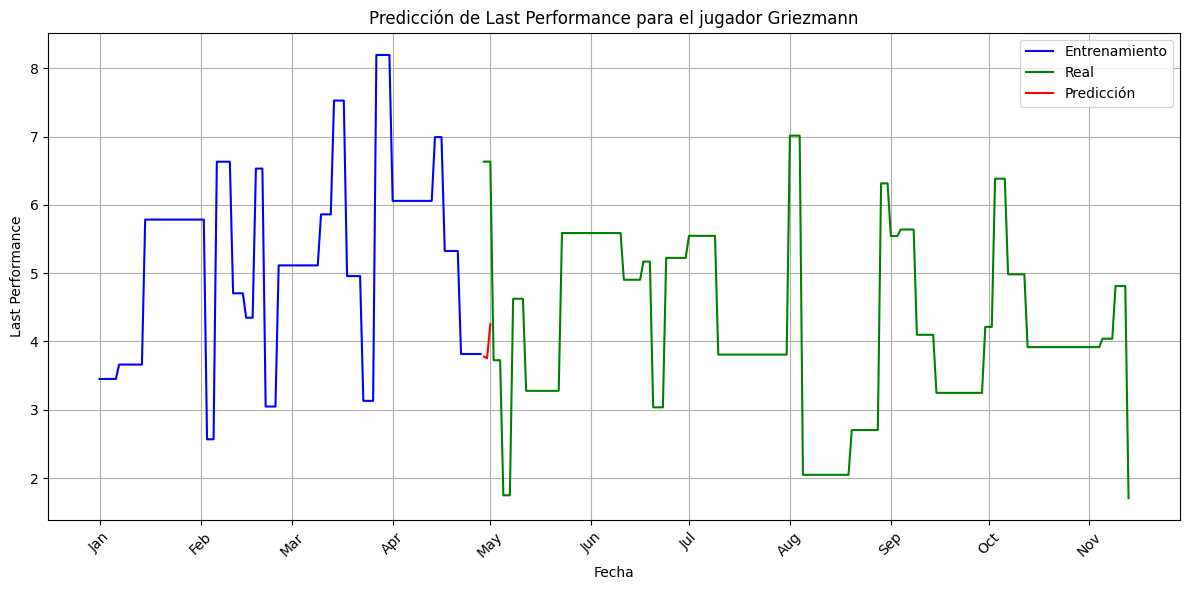

121 124


c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: Value

118
[3.451360585513066, 3.4513493468727443, 3.451339819457432, 3.451332003262391, 3.451325898283665, 3.451321504518216, 3.4513130173723368, 3.45129743227269, 3.6613799153322453, 3.6607549926077154, 3.6601357697359846, 3.65952223045872, 3.8689494614510926, 3.8683472411842903, 3.8677506566306747, 3.8671596921263034, 3.866574332154815, 3.865994561347002, 3.8653793324421266, 3.8645722626216323, 3.8630311731020774, 3.861294908799374, 3.859570013179519, 3.857856440953627, 4.065252045330334, 4.063560985213799, 4.061881114403734, 5.7663892973375654, 5.74904615929034, 5.731749658218029, 2.5401208361527643, 2.5114955013288784, 2.547296699775564, 2.5201328134785035, 2.4936854159575197, 6.515876951887925, 6.413395776113636, 6.302677758109548, 6.194665072737073, 4.406047918267783, 4.320396148601968, 4.237717381516678, 4.563962746533042, 4.483701146144987, 4.549499570350188, 6.406279584015205, 6.283709254022633, 5.655760536612982, 5.539765355489754, 5.175714742295341, 5.063954238555157, 4.8035855420

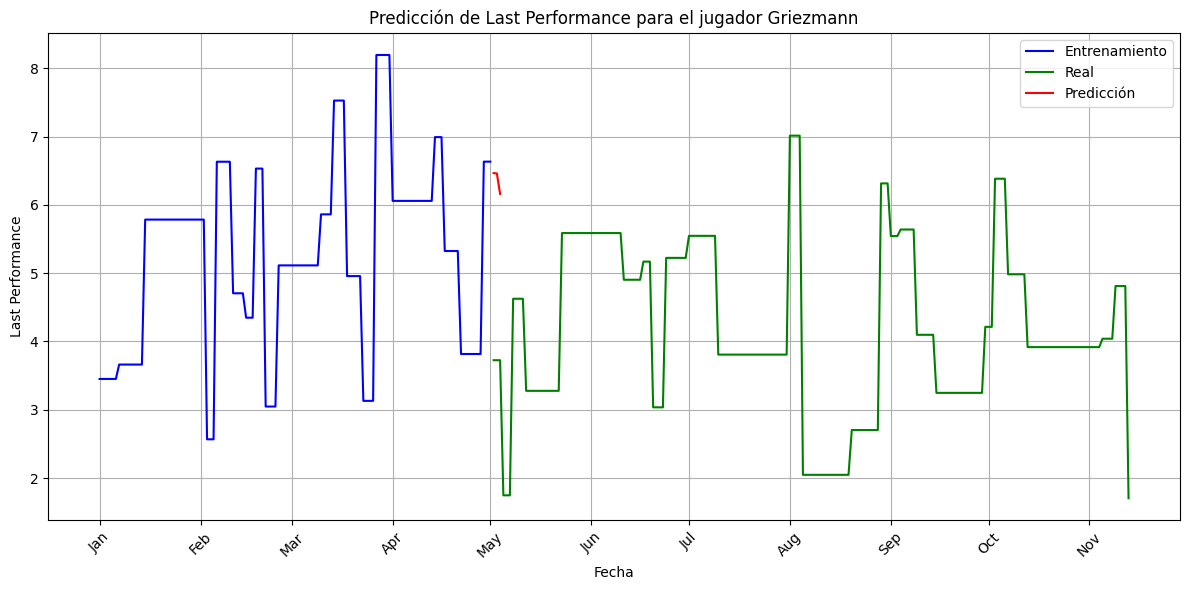

124 127


c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: Value

121
[3.451360585513066, 3.4513493468727443, 3.451339819457432, 3.451332003262391, 3.451325898283665, 3.451321504518216, 3.4513130173723368, 3.45129743227269, 3.6613799153322453, 3.6607549926077154, 3.6601357697359846, 3.65952223045872, 3.8689494614510926, 3.8683472411842903, 3.8677506566306747, 3.8671596921263034, 3.866574332154815, 3.865994561347002, 3.8653793324421266, 3.8645722626216323, 3.8630311731020774, 3.861294908799374, 3.859570013179519, 3.857856440953627, 4.065252045330334, 4.063560985213799, 4.061881114403734, 5.7663892973375654, 5.74904615929034, 5.731749658218029, 2.5401208361527643, 2.5114955013288784, 2.547296699775564, 2.5201328134785035, 2.4936854159575197, 6.515876951887925, 6.413395776113636, 6.302677758109548, 6.194665072737073, 4.406047918267783, 4.320396148601968, 4.237717381516678, 4.563962746533042, 4.483701146144987, 4.549499570350188, 6.406279584015205, 6.283709254022633, 5.655760536612982, 5.539765355489754, 5.175714742295341, 5.063954238555157, 4.8035855420

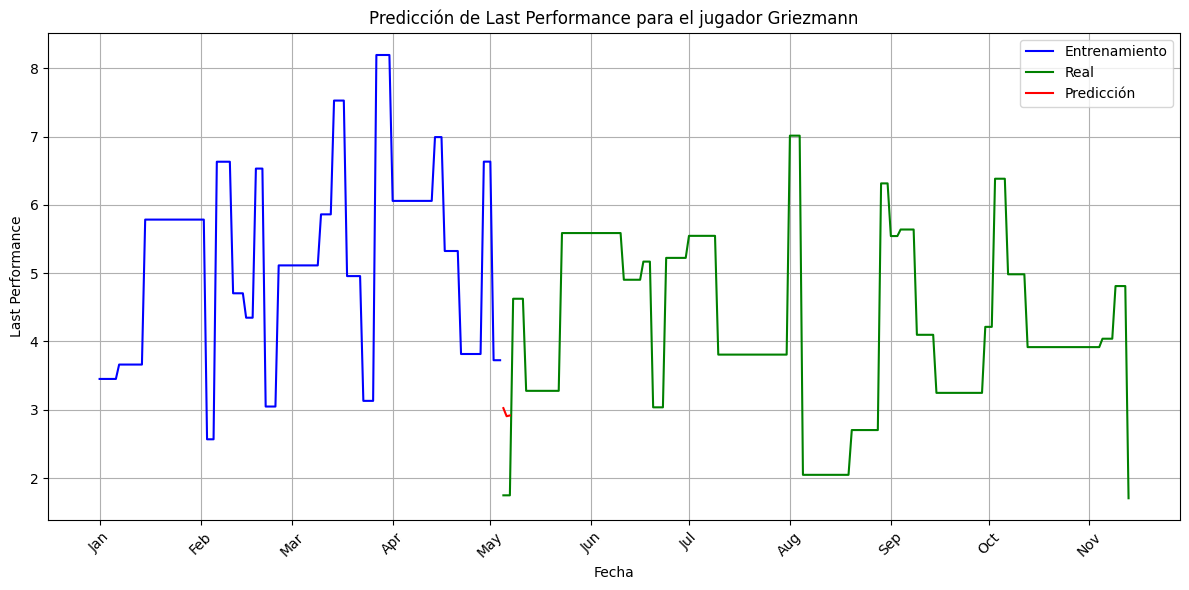

127 131


c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: Value

125
[3.451360585513066, 3.4513493468727443, 3.451339819457432, 3.451332003262391, 3.451325898283665, 3.451321504518216, 3.4513130173723368, 3.45129743227269, 3.6613799153322453, 3.6607549926077154, 3.6601357697359846, 3.65952223045872, 3.8689494614510926, 3.8683472411842903, 3.8677506566306747, 3.8671596921263034, 3.866574332154815, 3.865994561347002, 3.8653793324421266, 3.8645722626216323, 3.8630311731020774, 3.861294908799374, 3.859570013179519, 3.857856440953627, 4.065252045330334, 4.063560985213799, 4.061881114403734, 5.7663892973375654, 5.74904615929034, 5.731749658218029, 2.5401208361527643, 2.5114955013288784, 2.547296699775564, 2.5201328134785035, 2.4936854159575197, 6.515876951887925, 6.413395776113636, 6.302677758109548, 6.194665072737073, 4.406047918267783, 4.320396148601968, 4.237717381516678, 4.563962746533042, 4.483701146144987, 4.549499570350188, 6.406279584015205, 6.283709254022633, 5.655760536612982, 5.539765355489754, 5.175714742295341, 5.063954238555157, 4.8035855420

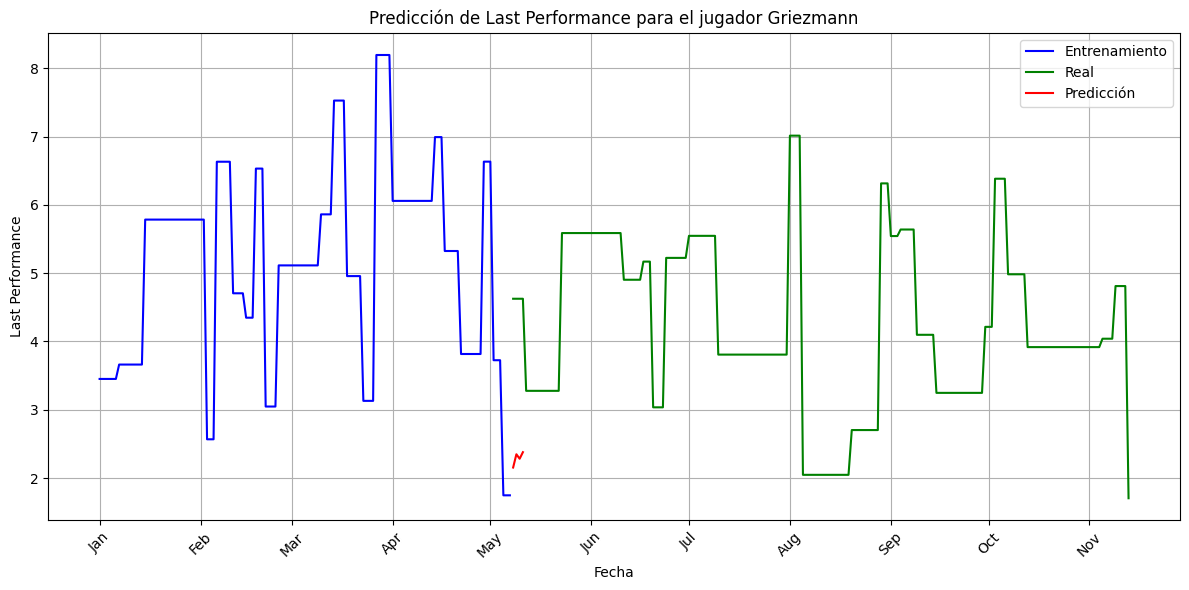

131 142


c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: Value

136
[3.451360585513066, 3.4513493468727443, 3.451339819457432, 3.451332003262391, 3.451325898283665, 3.451321504518216, 3.4513130173723368, 3.45129743227269, 3.6613799153322453, 3.6607549926077154, 3.6601357697359846, 3.65952223045872, 3.8689494614510926, 3.8683472411842903, 3.8677506566306747, 3.8671596921263034, 3.866574332154815, 3.865994561347002, 3.8653793324421266, 3.8645722626216323, 3.8630311731020774, 3.861294908799374, 3.859570013179519, 3.857856440953627, 4.065252045330334, 4.063560985213799, 4.061881114403734, 5.7663892973375654, 5.74904615929034, 5.731749658218029, 2.5401208361527643, 2.5114955013288784, 2.547296699775564, 2.5201328134785035, 2.4936854159575197, 6.515876951887925, 6.413395776113636, 6.302677758109548, 6.194665072737073, 4.406047918267783, 4.320396148601968, 4.237717381516678, 4.563962746533042, 4.483701146144987, 4.549499570350188, 6.406279584015205, 6.283709254022633, 5.655760536612982, 5.539765355489754, 5.175714742295341, 5.063954238555157, 4.8035855420

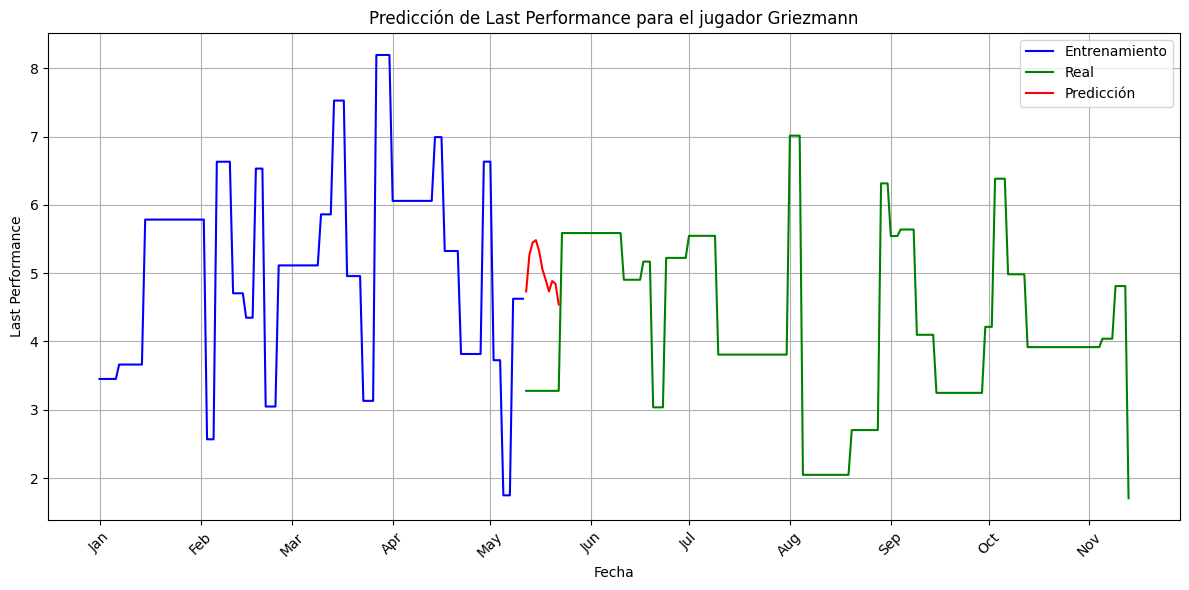

142 161


c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: Value

155
[3.451360585513066, 3.4513493468727443, 3.451339819457432, 3.451332003262391, 3.451325898283665, 3.451321504518216, 3.4513130173723368, 3.45129743227269, 3.6613799153322453, 3.6607549926077154, 3.6601357697359846, 3.65952223045872, 3.8689494614510926, 3.8683472411842903, 3.8677506566306747, 3.8671596921263034, 3.866574332154815, 3.865994561347002, 3.8653793324421266, 3.8645722626216323, 3.8630311731020774, 3.861294908799374, 3.859570013179519, 3.857856440953627, 4.065252045330334, 4.063560985213799, 4.061881114403734, 5.7663892973375654, 5.74904615929034, 5.731749658218029, 2.5401208361527643, 2.5114955013288784, 2.547296699775564, 2.5201328134785035, 2.4936854159575197, 6.515876951887925, 6.413395776113636, 6.302677758109548, 6.194665072737073, 4.406047918267783, 4.320396148601968, 4.237717381516678, 4.563962746533042, 4.483701146144987, 4.549499570350188, 6.406279584015205, 6.283709254022633, 5.655760536612982, 5.539765355489754, 5.175714742295341, 5.063954238555157, 4.8035855420

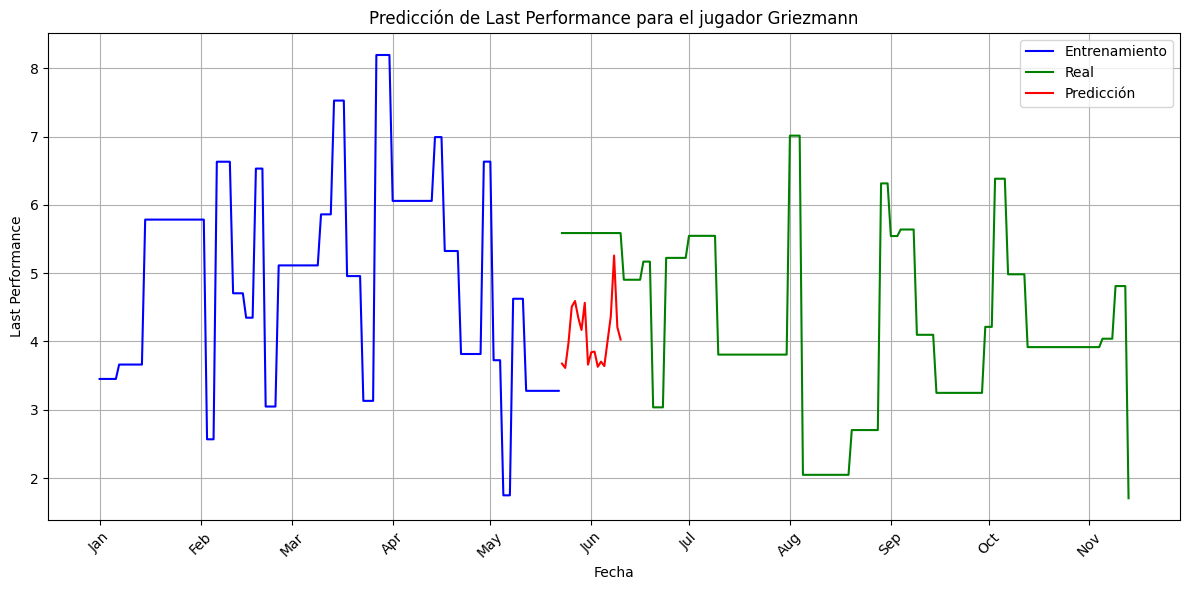

161 167


c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.p

161
[3.451360585513066, 3.4513493468727443, 3.451339819457432, 3.451332003262391, 3.451325898283665, 3.451321504518216, 3.4513130173723368, 3.45129743227269, 3.6613799153322453, 3.6607549926077154, 3.6601357697359846, 3.65952223045872, 3.8689494614510926, 3.8683472411842903, 3.8677506566306747, 3.8671596921263034, 3.866574332154815, 3.865994561347002, 3.8653793324421266, 3.8645722626216323, 3.8630311731020774, 3.861294908799374, 3.859570013179519, 3.857856440953627, 4.065252045330334, 4.063560985213799, 4.061881114403734, 5.7663892973375654, 5.74904615929034, 5.731749658218029, 2.5401208361527643, 2.5114955013288784, 2.547296699775564, 2.5201328134785035, 2.4936854159575197, 6.515876951887925, 6.413395776113636, 6.302677758109548, 6.194665072737073, 4.406047918267783, 4.320396148601968, 4.237717381516678, 4.563962746533042, 4.483701146144987, 4.549499570350188, 6.406279584015205, 6.283709254022633, 5.655760536612982, 5.539765355489754, 5.175714742295341, 5.063954238555157, 4.8035855420

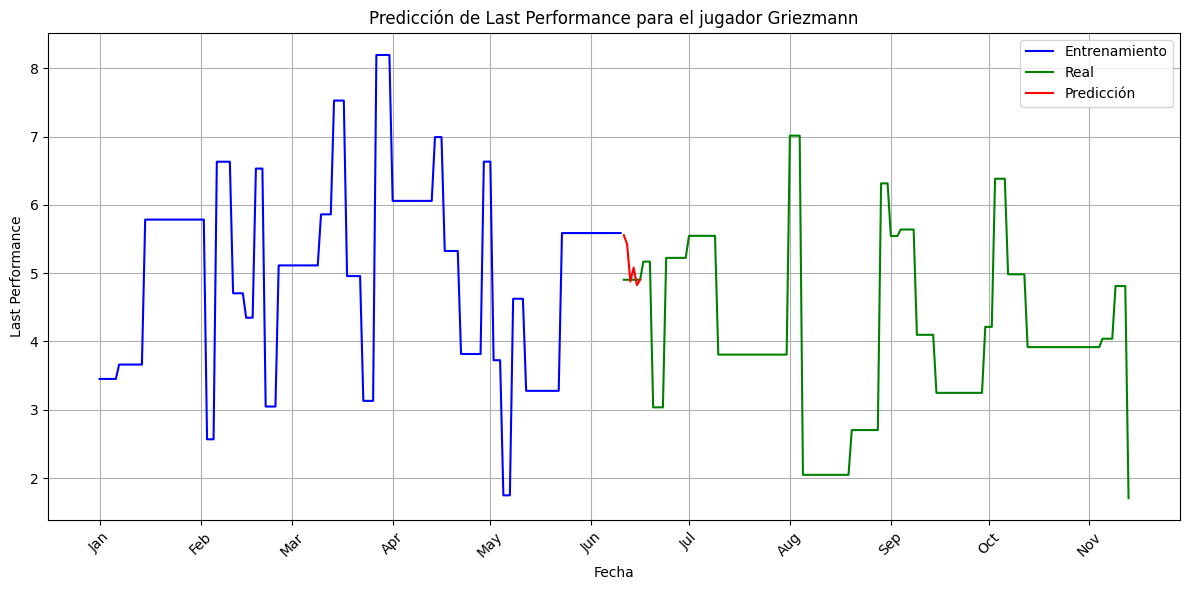

167 170


c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: Value

164
[3.451360585513066, 3.4513493468727443, 3.451339819457432, 3.451332003262391, 3.451325898283665, 3.451321504518216, 3.4513130173723368, 3.45129743227269, 3.6613799153322453, 3.6607549926077154, 3.6601357697359846, 3.65952223045872, 3.8689494614510926, 3.8683472411842903, 3.8677506566306747, 3.8671596921263034, 3.866574332154815, 3.865994561347002, 3.8653793324421266, 3.8645722626216323, 3.8630311731020774, 3.861294908799374, 3.859570013179519, 3.857856440953627, 4.065252045330334, 4.063560985213799, 4.061881114403734, 5.7663892973375654, 5.74904615929034, 5.731749658218029, 2.5401208361527643, 2.5114955013288784, 2.547296699775564, 2.5201328134785035, 2.4936854159575197, 6.515876951887925, 6.413395776113636, 6.302677758109548, 6.194665072737073, 4.406047918267783, 4.320396148601968, 4.237717381516678, 4.563962746533042, 4.483701146144987, 4.549499570350188, 6.406279584015205, 6.283709254022633, 5.655760536612982, 5.539765355489754, 5.175714742295341, 5.063954238555157, 4.8035855420

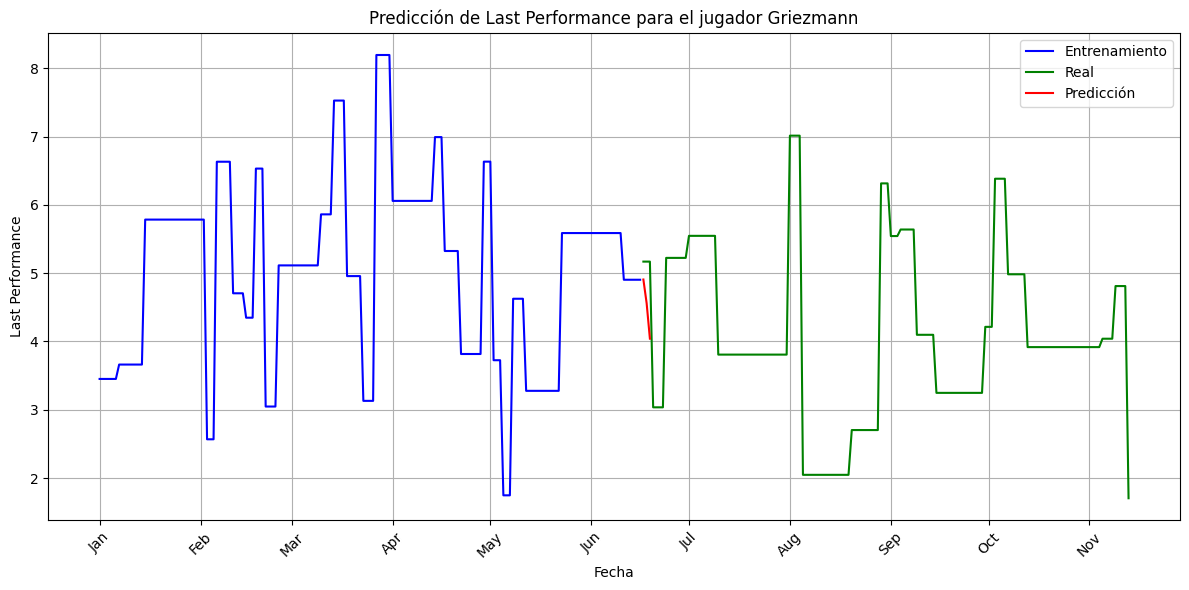

170 174


c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: Value

168
[3.451360585513066, 3.4513493468727443, 3.451339819457432, 3.451332003262391, 3.451325898283665, 3.451321504518216, 3.4513130173723368, 3.45129743227269, 3.6613799153322453, 3.6607549926077154, 3.6601357697359846, 3.65952223045872, 3.8689494614510926, 3.8683472411842903, 3.8677506566306747, 3.8671596921263034, 3.866574332154815, 3.865994561347002, 3.8653793324421266, 3.8645722626216323, 3.8630311731020774, 3.861294908799374, 3.859570013179519, 3.857856440953627, 4.065252045330334, 4.063560985213799, 4.061881114403734, 5.7663892973375654, 5.74904615929034, 5.731749658218029, 2.5401208361527643, 2.5114955013288784, 2.547296699775564, 2.5201328134785035, 2.4936854159575197, 6.515876951887925, 6.413395776113636, 6.302677758109548, 6.194665072737073, 4.406047918267783, 4.320396148601968, 4.237717381516678, 4.563962746533042, 4.483701146144987, 4.549499570350188, 6.406279584015205, 6.283709254022633, 5.655760536612982, 5.539765355489754, 5.175714742295341, 5.063954238555157, 4.8035855420

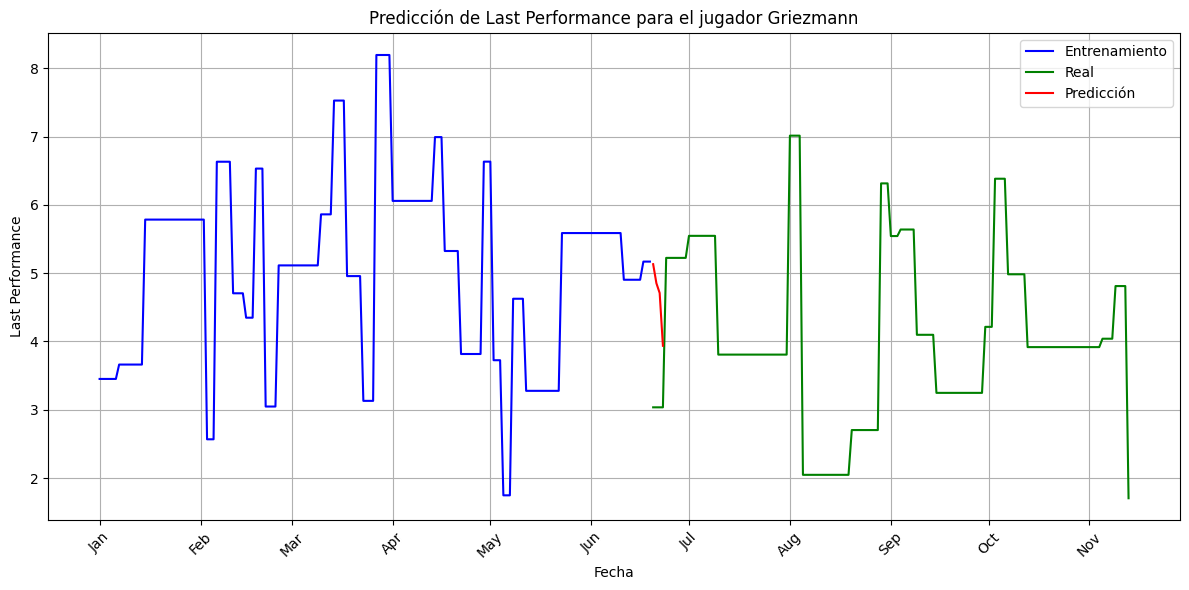

174 181


c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.p

175
[3.451360585513066, 3.4513493468727443, 3.451339819457432, 3.451332003262391, 3.451325898283665, 3.451321504518216, 3.4513130173723368, 3.45129743227269, 3.6613799153322453, 3.6607549926077154, 3.6601357697359846, 3.65952223045872, 3.8689494614510926, 3.8683472411842903, 3.8677506566306747, 3.8671596921263034, 3.866574332154815, 3.865994561347002, 3.8653793324421266, 3.8645722626216323, 3.8630311731020774, 3.861294908799374, 3.859570013179519, 3.857856440953627, 4.065252045330334, 4.063560985213799, 4.061881114403734, 5.7663892973375654, 5.74904615929034, 5.731749658218029, 2.5401208361527643, 2.5114955013288784, 2.547296699775564, 2.5201328134785035, 2.4936854159575197, 6.515876951887925, 6.413395776113636, 6.302677758109548, 6.194665072737073, 4.406047918267783, 4.320396148601968, 4.237717381516678, 4.563962746533042, 4.483701146144987, 4.549499570350188, 6.406279584015205, 6.283709254022633, 5.655760536612982, 5.539765355489754, 5.175714742295341, 5.063954238555157, 4.8035855420

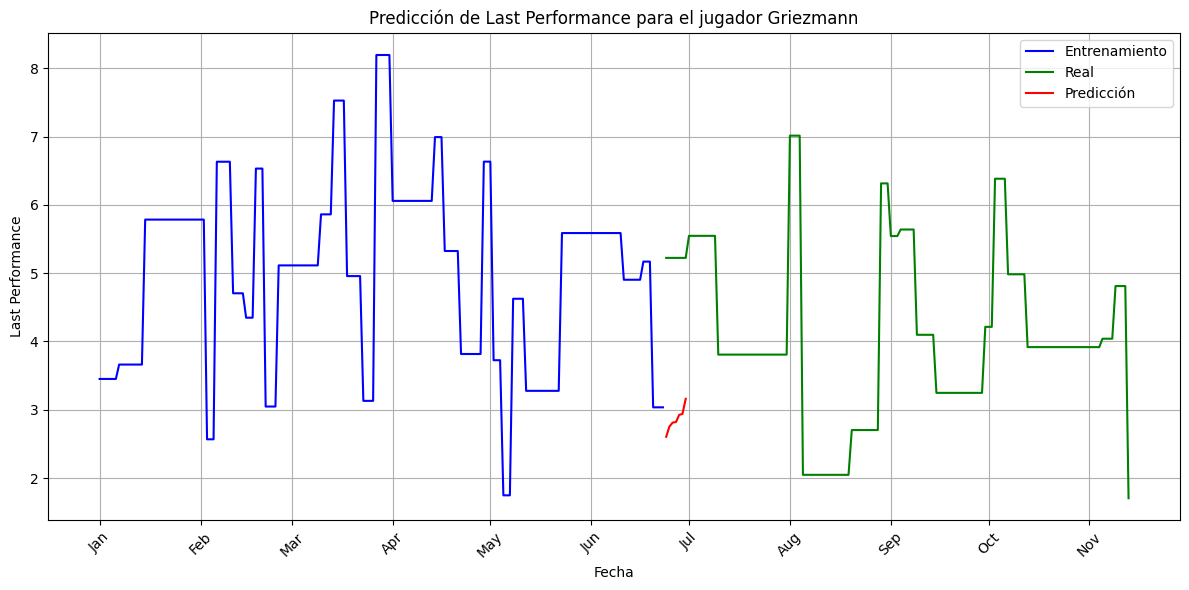

181 190


c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.p

184
[3.451360585513066, 3.4513493468727443, 3.451339819457432, 3.451332003262391, 3.451325898283665, 3.451321504518216, 3.4513130173723368, 3.45129743227269, 3.6613799153322453, 3.6607549926077154, 3.6601357697359846, 3.65952223045872, 3.8689494614510926, 3.8683472411842903, 3.8677506566306747, 3.8671596921263034, 3.866574332154815, 3.865994561347002, 3.8653793324421266, 3.8645722626216323, 3.8630311731020774, 3.861294908799374, 3.859570013179519, 3.857856440953627, 4.065252045330334, 4.063560985213799, 4.061881114403734, 5.7663892973375654, 5.74904615929034, 5.731749658218029, 2.5401208361527643, 2.5114955013288784, 2.547296699775564, 2.5201328134785035, 2.4936854159575197, 6.515876951887925, 6.413395776113636, 6.302677758109548, 6.194665072737073, 4.406047918267783, 4.320396148601968, 4.237717381516678, 4.563962746533042, 4.483701146144987, 4.549499570350188, 6.406279584015205, 6.283709254022633, 5.655760536612982, 5.539765355489754, 5.175714742295341, 5.063954238555157, 4.8035855420

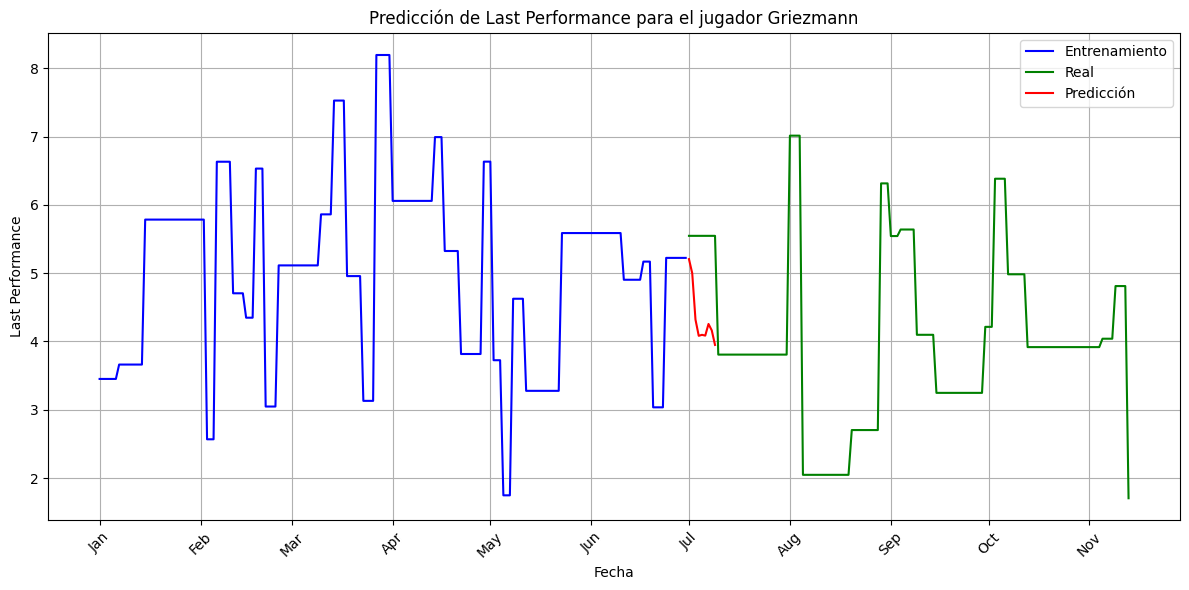

190 212


c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.p

206
[3.451360585513066, 3.4513493468727443, 3.451339819457432, 3.451332003262391, 3.451325898283665, 3.451321504518216, 3.4513130173723368, 3.45129743227269, 3.6613799153322453, 3.6607549926077154, 3.6601357697359846, 3.65952223045872, 3.8689494614510926, 3.8683472411842903, 3.8677506566306747, 3.8671596921263034, 3.866574332154815, 3.865994561347002, 3.8653793324421266, 3.8645722626216323, 3.8630311731020774, 3.861294908799374, 3.859570013179519, 3.857856440953627, 4.065252045330334, 4.063560985213799, 4.061881114403734, 5.7663892973375654, 5.74904615929034, 5.731749658218029, 2.5401208361527643, 2.5114955013288784, 2.547296699775564, 2.5201328134785035, 2.4936854159575197, 6.515876951887925, 6.413395776113636, 6.302677758109548, 6.194665072737073, 4.406047918267783, 4.320396148601968, 4.237717381516678, 4.563962746533042, 4.483701146144987, 4.549499570350188, 6.406279584015205, 6.283709254022633, 5.655760536612982, 5.539765355489754, 5.175714742295341, 5.063954238555157, 4.8035855420

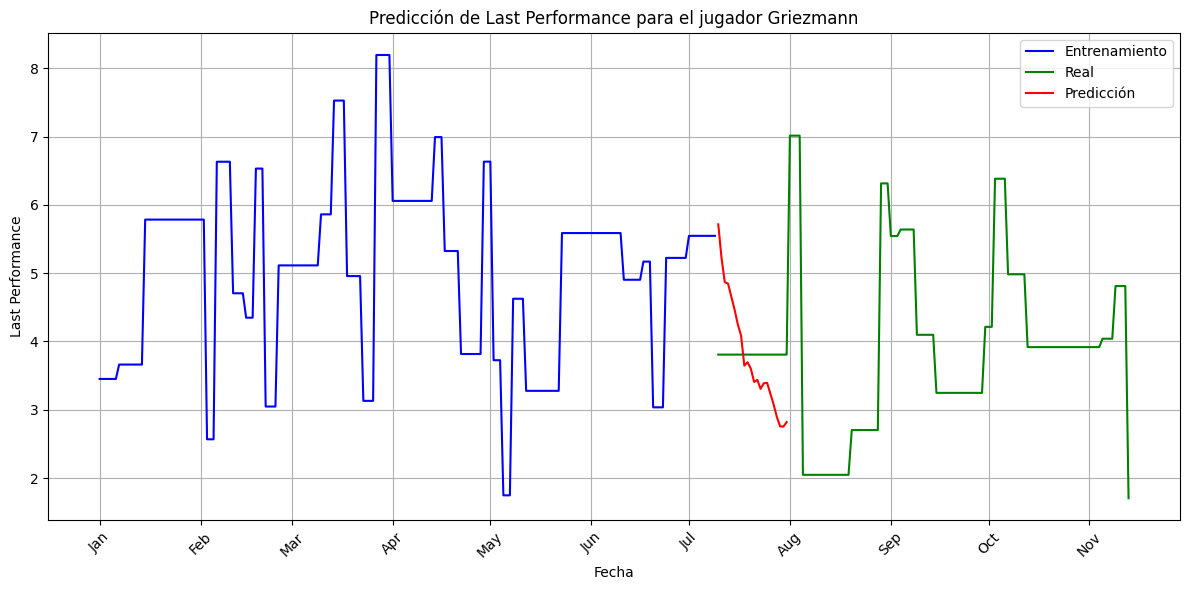

212 216


c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.p

210
[3.451360585513066, 3.4513493468727443, 3.451339819457432, 3.451332003262391, 3.451325898283665, 3.451321504518216, 3.4513130173723368, 3.45129743227269, 3.6613799153322453, 3.6607549926077154, 3.6601357697359846, 3.65952223045872, 3.8689494614510926, 3.8683472411842903, 3.8677506566306747, 3.8671596921263034, 3.866574332154815, 3.865994561347002, 3.8653793324421266, 3.8645722626216323, 3.8630311731020774, 3.861294908799374, 3.859570013179519, 3.857856440953627, 4.065252045330334, 4.063560985213799, 4.061881114403734, 5.7663892973375654, 5.74904615929034, 5.731749658218029, 2.5401208361527643, 2.5114955013288784, 2.547296699775564, 2.5201328134785035, 2.4936854159575197, 6.515876951887925, 6.413395776113636, 6.302677758109548, 6.194665072737073, 4.406047918267783, 4.320396148601968, 4.237717381516678, 4.563962746533042, 4.483701146144987, 4.549499570350188, 6.406279584015205, 6.283709254022633, 5.655760536612982, 5.539765355489754, 5.175714742295341, 5.063954238555157, 4.8035855420

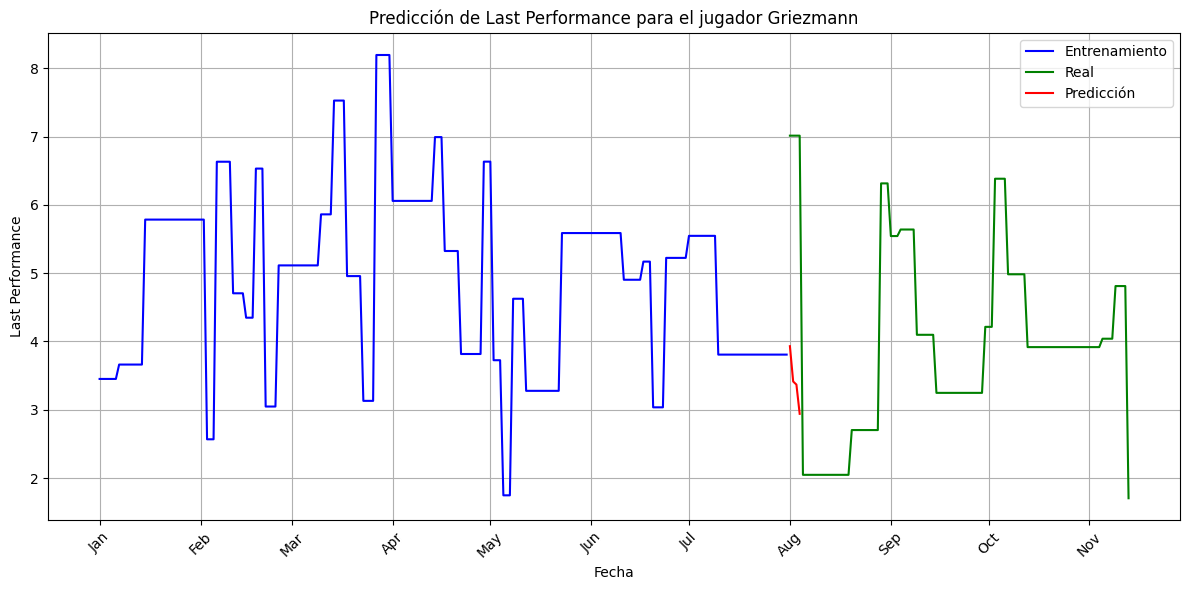

216 231


c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.p

225
[3.451360585513066, 3.4513493468727443, 3.451339819457432, 3.451332003262391, 3.451325898283665, 3.451321504518216, 3.4513130173723368, 3.45129743227269, 3.6613799153322453, 3.6607549926077154, 3.6601357697359846, 3.65952223045872, 3.8689494614510926, 3.8683472411842903, 3.8677506566306747, 3.8671596921263034, 3.866574332154815, 3.865994561347002, 3.8653793324421266, 3.8645722626216323, 3.8630311731020774, 3.861294908799374, 3.859570013179519, 3.857856440953627, 4.065252045330334, 4.063560985213799, 4.061881114403734, 5.7663892973375654, 5.74904615929034, 5.731749658218029, 2.5401208361527643, 2.5114955013288784, 2.547296699775564, 2.5201328134785035, 2.4936854159575197, 6.515876951887925, 6.413395776113636, 6.302677758109548, 6.194665072737073, 4.406047918267783, 4.320396148601968, 4.237717381516678, 4.563962746533042, 4.483701146144987, 4.549499570350188, 6.406279584015205, 6.283709254022633, 5.655760536612982, 5.539765355489754, 5.175714742295341, 5.063954238555157, 4.8035855420

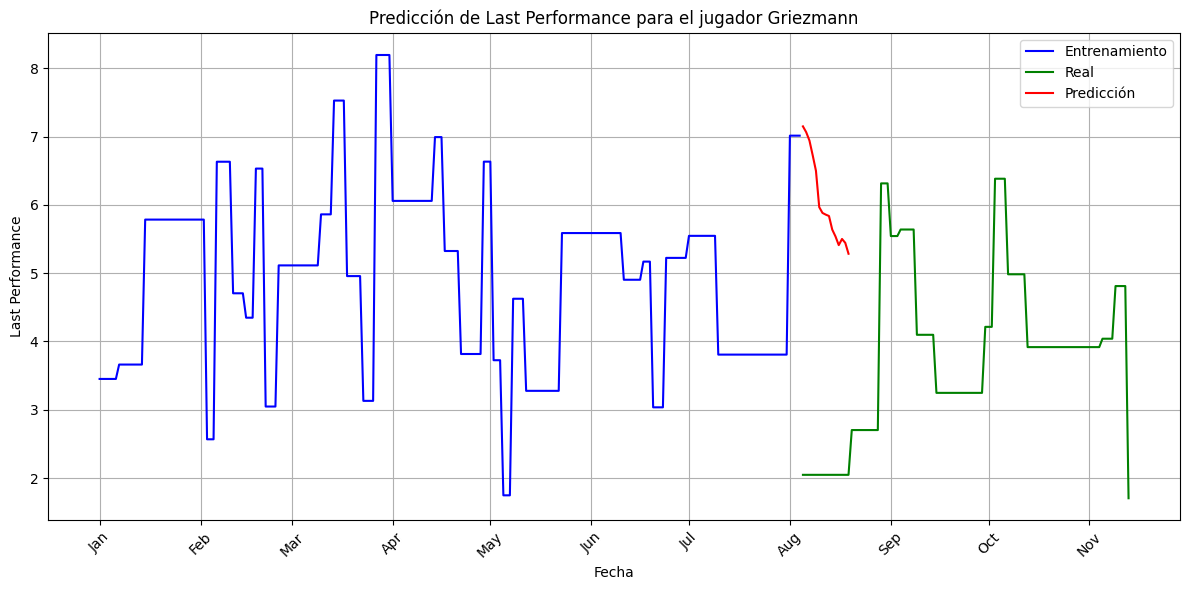

231 240


c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.p

234
[3.451360585513066, 3.4513493468727443, 3.451339819457432, 3.451332003262391, 3.451325898283665, 3.451321504518216, 3.4513130173723368, 3.45129743227269, 3.6613799153322453, 3.6607549926077154, 3.6601357697359846, 3.65952223045872, 3.8689494614510926, 3.8683472411842903, 3.8677506566306747, 3.8671596921263034, 3.866574332154815, 3.865994561347002, 3.8653793324421266, 3.8645722626216323, 3.8630311731020774, 3.861294908799374, 3.859570013179519, 3.857856440953627, 4.065252045330334, 4.063560985213799, 4.061881114403734, 5.7663892973375654, 5.74904615929034, 5.731749658218029, 2.5401208361527643, 2.5114955013288784, 2.547296699775564, 2.5201328134785035, 2.4936854159575197, 6.515876951887925, 6.413395776113636, 6.302677758109548, 6.194665072737073, 4.406047918267783, 4.320396148601968, 4.237717381516678, 4.563962746533042, 4.483701146144987, 4.549499570350188, 6.406279584015205, 6.283709254022633, 5.655760536612982, 5.539765355489754, 5.175714742295341, 5.063954238555157, 4.8035855420

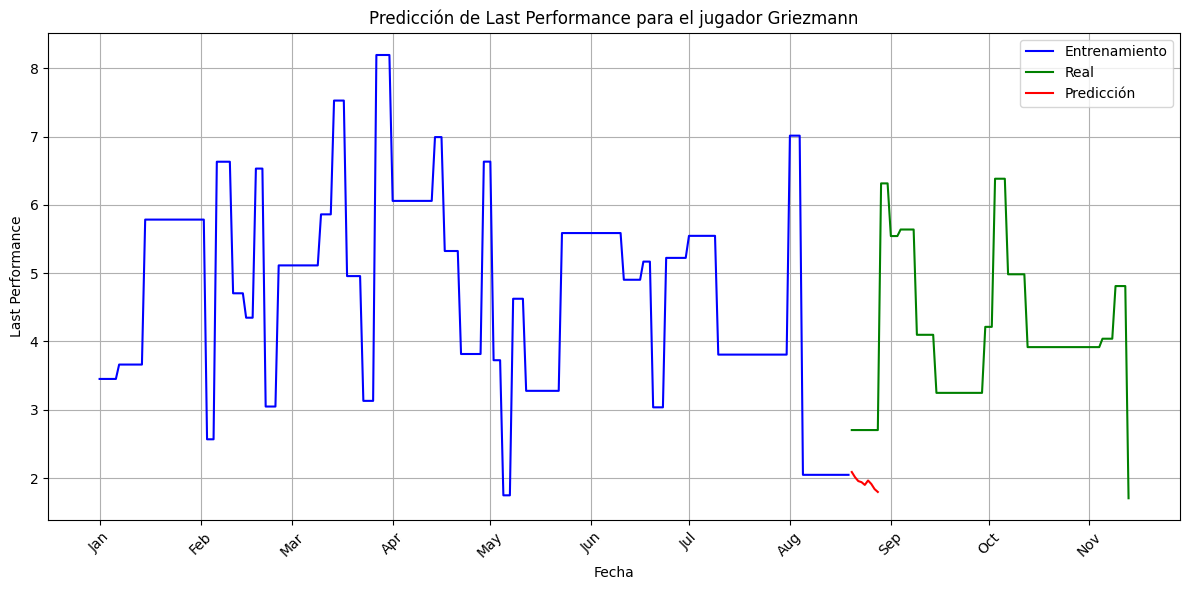

240 243


c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.p

237
[3.451360585513066, 3.4513493468727443, 3.451339819457432, 3.451332003262391, 3.451325898283665, 3.451321504518216, 3.4513130173723368, 3.45129743227269, 3.6613799153322453, 3.6607549926077154, 3.6601357697359846, 3.65952223045872, 3.8689494614510926, 3.8683472411842903, 3.8677506566306747, 3.8671596921263034, 3.866574332154815, 3.865994561347002, 3.8653793324421266, 3.8645722626216323, 3.8630311731020774, 3.861294908799374, 3.859570013179519, 3.857856440953627, 4.065252045330334, 4.063560985213799, 4.061881114403734, 5.7663892973375654, 5.74904615929034, 5.731749658218029, 2.5401208361527643, 2.5114955013288784, 2.547296699775564, 2.5201328134785035, 2.4936854159575197, 6.515876951887925, 6.413395776113636, 6.302677758109548, 6.194665072737073, 4.406047918267783, 4.320396148601968, 4.237717381516678, 4.563962746533042, 4.483701146144987, 4.549499570350188, 6.406279584015205, 6.283709254022633, 5.655760536612982, 5.539765355489754, 5.175714742295341, 5.063954238555157, 4.8035855420

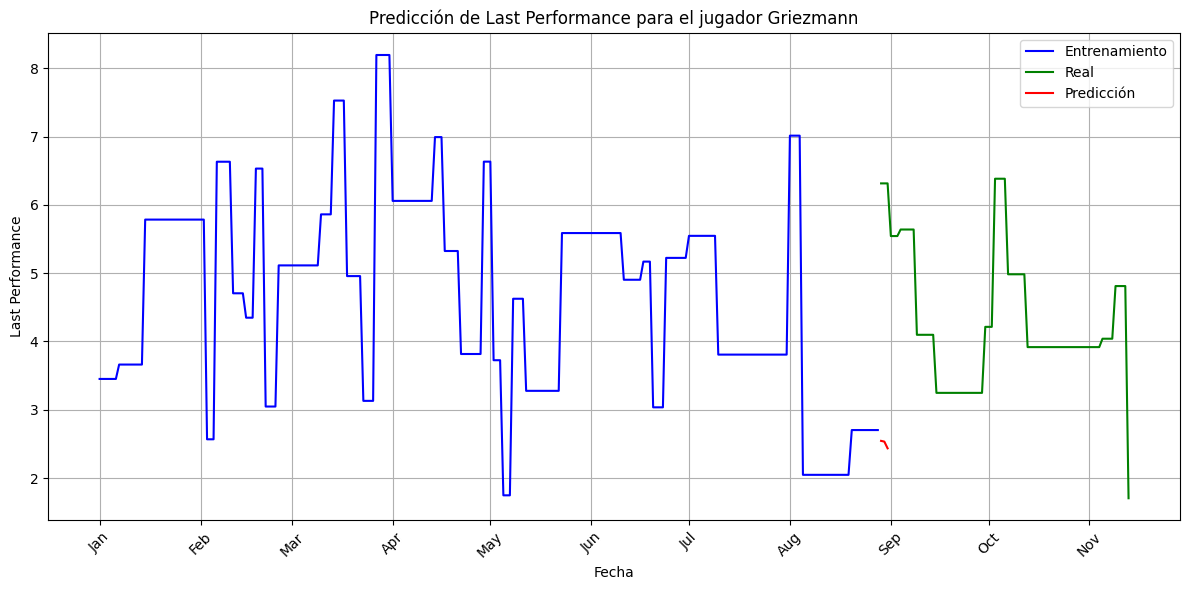

243 246


c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.p

240
[3.451360585513066, 3.4513493468727443, 3.451339819457432, 3.451332003262391, 3.451325898283665, 3.451321504518216, 3.4513130173723368, 3.45129743227269, 3.6613799153322453, 3.6607549926077154, 3.6601357697359846, 3.65952223045872, 3.8689494614510926, 3.8683472411842903, 3.8677506566306747, 3.8671596921263034, 3.866574332154815, 3.865994561347002, 3.8653793324421266, 3.8645722626216323, 3.8630311731020774, 3.861294908799374, 3.859570013179519, 3.857856440953627, 4.065252045330334, 4.063560985213799, 4.061881114403734, 5.7663892973375654, 5.74904615929034, 5.731749658218029, 2.5401208361527643, 2.5114955013288784, 2.547296699775564, 2.5201328134785035, 2.4936854159575197, 6.515876951887925, 6.413395776113636, 6.302677758109548, 6.194665072737073, 4.406047918267783, 4.320396148601968, 4.237717381516678, 4.563962746533042, 4.483701146144987, 4.549499570350188, 6.406279584015205, 6.283709254022633, 5.655760536612982, 5.539765355489754, 5.175714742295341, 5.063954238555157, 4.8035855420

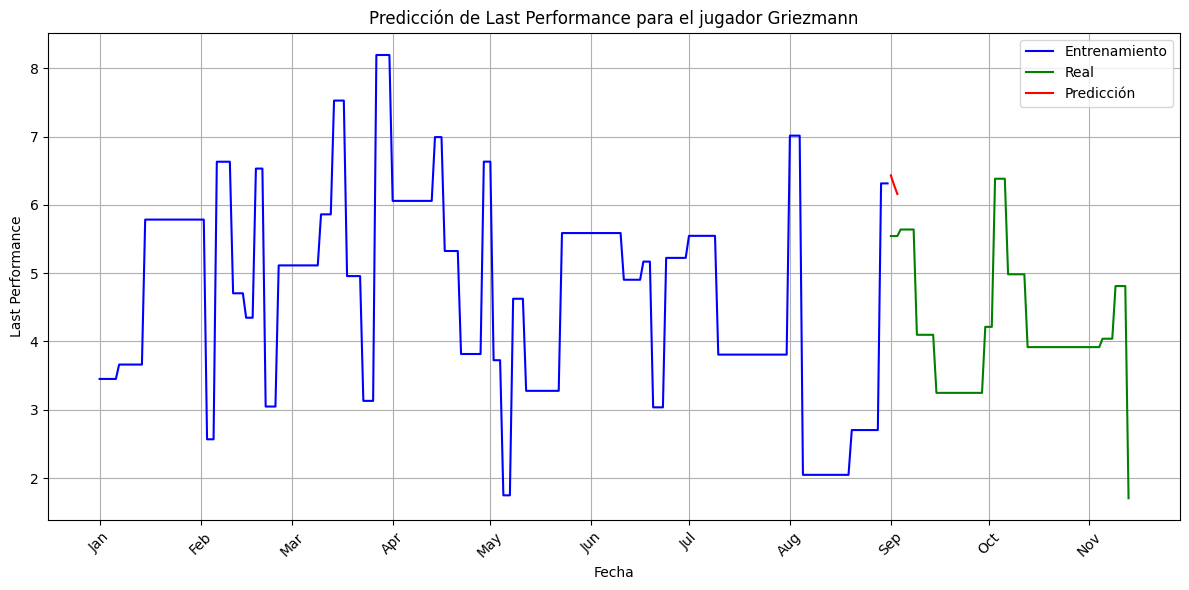

246 251


c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: Value

245
[3.451360585513066, 3.4513493468727443, 3.451339819457432, 3.451332003262391, 3.451325898283665, 3.451321504518216, 3.4513130173723368, 3.45129743227269, 3.6613799153322453, 3.6607549926077154, 3.6601357697359846, 3.65952223045872, 3.8689494614510926, 3.8683472411842903, 3.8677506566306747, 3.8671596921263034, 3.866574332154815, 3.865994561347002, 3.8653793324421266, 3.8645722626216323, 3.8630311731020774, 3.861294908799374, 3.859570013179519, 3.857856440953627, 4.065252045330334, 4.063560985213799, 4.061881114403734, 5.7663892973375654, 5.74904615929034, 5.731749658218029, 2.5401208361527643, 2.5114955013288784, 2.547296699775564, 2.5201328134785035, 2.4936854159575197, 6.515876951887925, 6.413395776113636, 6.302677758109548, 6.194665072737073, 4.406047918267783, 4.320396148601968, 4.237717381516678, 4.563962746533042, 4.483701146144987, 4.549499570350188, 6.406279584015205, 6.283709254022633, 5.655760536612982, 5.539765355489754, 5.175714742295341, 5.063954238555157, 4.8035855420

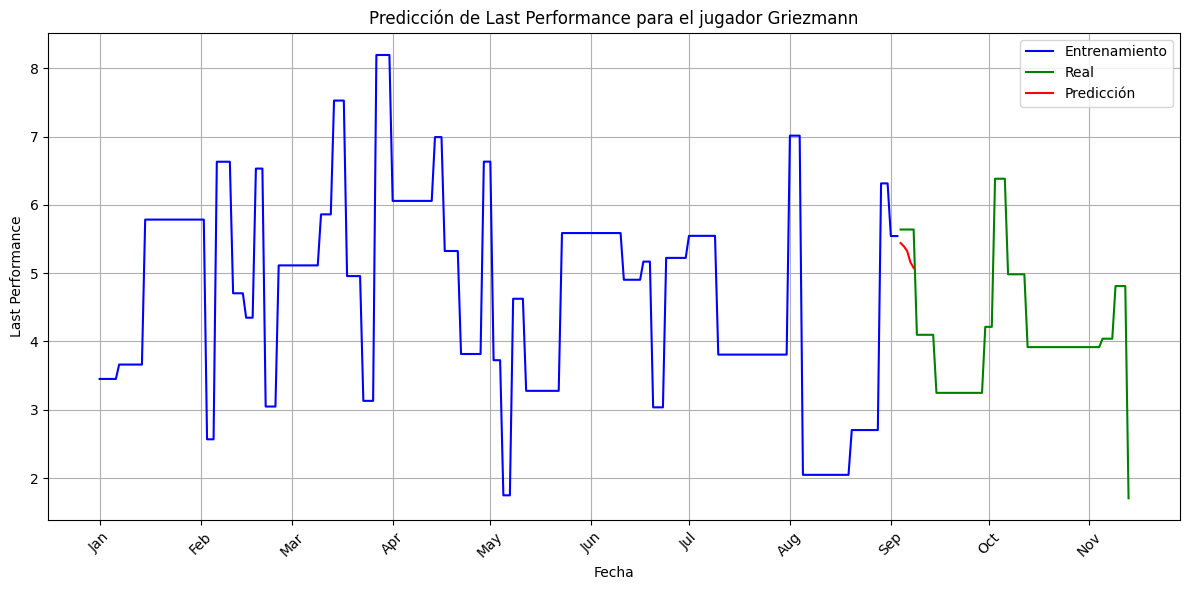

251 257


c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: Value

251
[3.451360585513066, 3.4513493468727443, 3.451339819457432, 3.451332003262391, 3.451325898283665, 3.451321504518216, 3.4513130173723368, 3.45129743227269, 3.6613799153322453, 3.6607549926077154, 3.6601357697359846, 3.65952223045872, 3.8689494614510926, 3.8683472411842903, 3.8677506566306747, 3.8671596921263034, 3.866574332154815, 3.865994561347002, 3.8653793324421266, 3.8645722626216323, 3.8630311731020774, 3.861294908799374, 3.859570013179519, 3.857856440953627, 4.065252045330334, 4.063560985213799, 4.061881114403734, 5.7663892973375654, 5.74904615929034, 5.731749658218029, 2.5401208361527643, 2.5114955013288784, 2.547296699775564, 2.5201328134785035, 2.4936854159575197, 6.515876951887925, 6.413395776113636, 6.302677758109548, 6.194665072737073, 4.406047918267783, 4.320396148601968, 4.237717381516678, 4.563962746533042, 4.483701146144987, 4.549499570350188, 6.406279584015205, 6.283709254022633, 5.655760536612982, 5.539765355489754, 5.175714742295341, 5.063954238555157, 4.8035855420

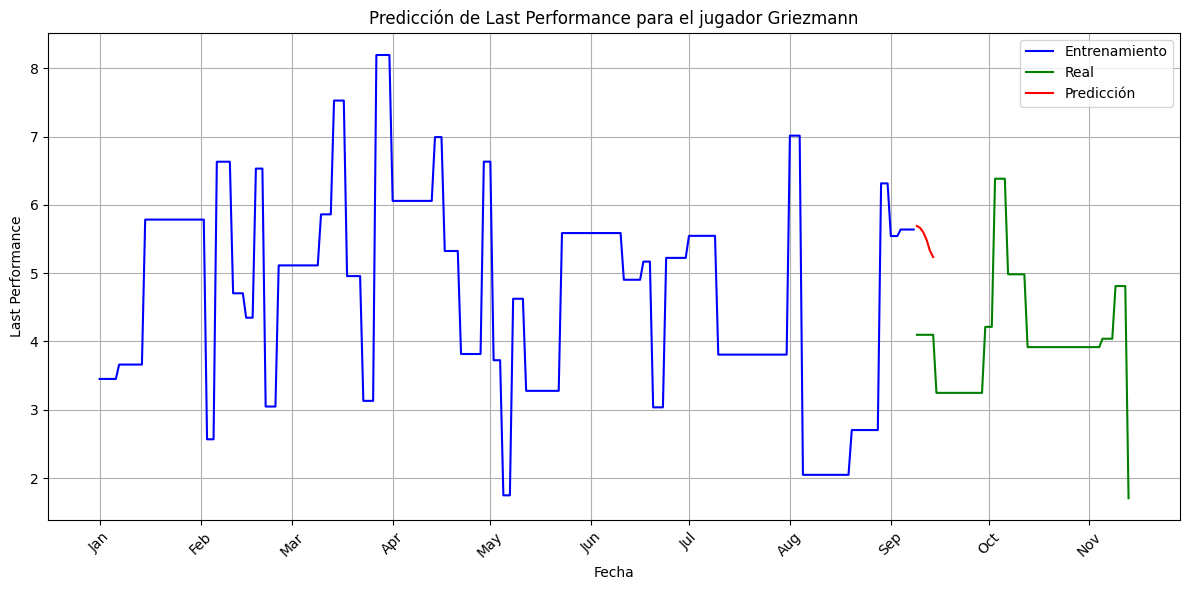

257 272


c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: Value

266
[3.451360585513066, 3.4513493468727443, 3.451339819457432, 3.451332003262391, 3.451325898283665, 3.451321504518216, 3.4513130173723368, 3.45129743227269, 3.6613799153322453, 3.6607549926077154, 3.6601357697359846, 3.65952223045872, 3.8689494614510926, 3.8683472411842903, 3.8677506566306747, 3.8671596921263034, 3.866574332154815, 3.865994561347002, 3.8653793324421266, 3.8645722626216323, 3.8630311731020774, 3.861294908799374, 3.859570013179519, 3.857856440953627, 4.065252045330334, 4.063560985213799, 4.061881114403734, 5.7663892973375654, 5.74904615929034, 5.731749658218029, 2.5401208361527643, 2.5114955013288784, 2.547296699775564, 2.5201328134785035, 2.4936854159575197, 6.515876951887925, 6.413395776113636, 6.302677758109548, 6.194665072737073, 4.406047918267783, 4.320396148601968, 4.237717381516678, 4.563962746533042, 4.483701146144987, 4.549499570350188, 6.406279584015205, 6.283709254022633, 5.655760536612982, 5.539765355489754, 5.175714742295341, 5.063954238555157, 4.8035855420

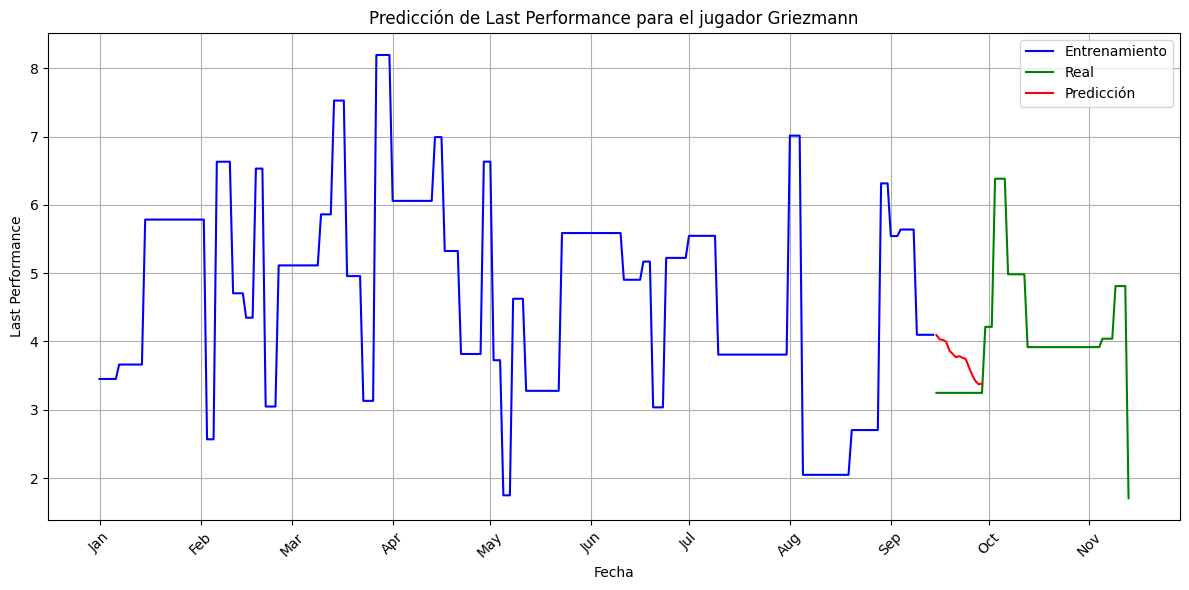

272 275


c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: Value

269
[3.451360585513066, 3.4513493468727443, 3.451339819457432, 3.451332003262391, 3.451325898283665, 3.451321504518216, 3.4513130173723368, 3.45129743227269, 3.6613799153322453, 3.6607549926077154, 3.6601357697359846, 3.65952223045872, 3.8689494614510926, 3.8683472411842903, 3.8677506566306747, 3.8671596921263034, 3.866574332154815, 3.865994561347002, 3.8653793324421266, 3.8645722626216323, 3.8630311731020774, 3.861294908799374, 3.859570013179519, 3.857856440953627, 4.065252045330334, 4.063560985213799, 4.061881114403734, 5.7663892973375654, 5.74904615929034, 5.731749658218029, 2.5401208361527643, 2.5114955013288784, 2.547296699775564, 2.5201328134785035, 2.4936854159575197, 6.515876951887925, 6.413395776113636, 6.302677758109548, 6.194665072737073, 4.406047918267783, 4.320396148601968, 4.237717381516678, 4.563962746533042, 4.483701146144987, 4.549499570350188, 6.406279584015205, 6.283709254022633, 5.655760536612982, 5.539765355489754, 5.175714742295341, 5.063954238555157, 4.8035855420

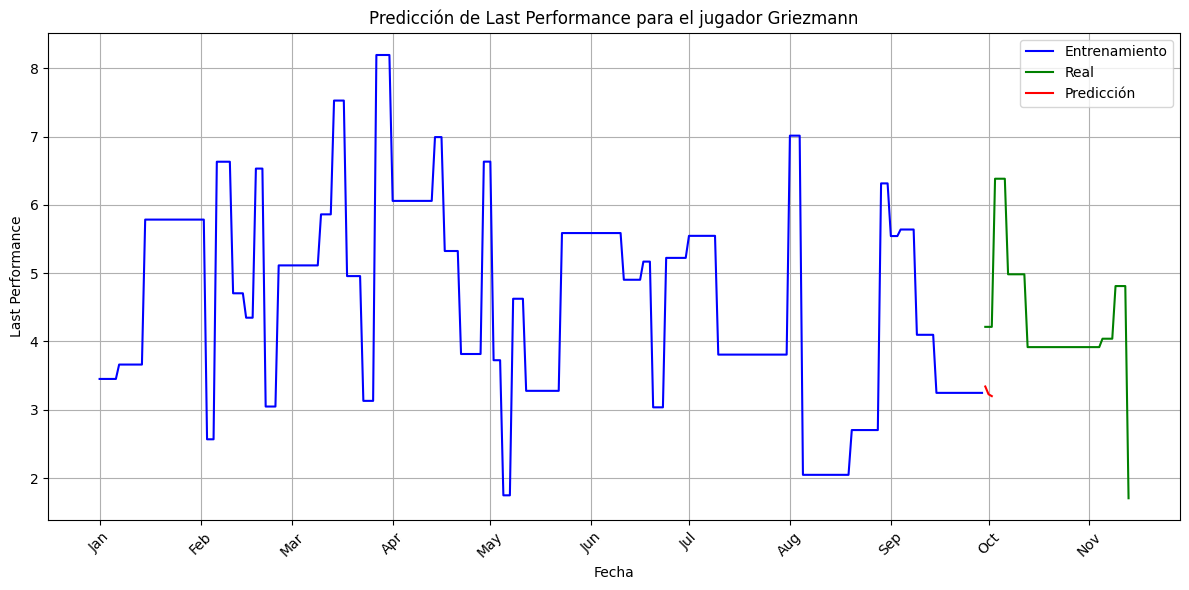

275 279


c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: Value

273
[3.451360585513066, 3.4513493468727443, 3.451339819457432, 3.451332003262391, 3.451325898283665, 3.451321504518216, 3.4513130173723368, 3.45129743227269, 3.6613799153322453, 3.6607549926077154, 3.6601357697359846, 3.65952223045872, 3.8689494614510926, 3.8683472411842903, 3.8677506566306747, 3.8671596921263034, 3.866574332154815, 3.865994561347002, 3.8653793324421266, 3.8645722626216323, 3.8630311731020774, 3.861294908799374, 3.859570013179519, 3.857856440953627, 4.065252045330334, 4.063560985213799, 4.061881114403734, 5.7663892973375654, 5.74904615929034, 5.731749658218029, 2.5401208361527643, 2.5114955013288784, 2.547296699775564, 2.5201328134785035, 2.4936854159575197, 6.515876951887925, 6.413395776113636, 6.302677758109548, 6.194665072737073, 4.406047918267783, 4.320396148601968, 4.237717381516678, 4.563962746533042, 4.483701146144987, 4.549499570350188, 6.406279584015205, 6.283709254022633, 5.655760536612982, 5.539765355489754, 5.175714742295341, 5.063954238555157, 4.8035855420

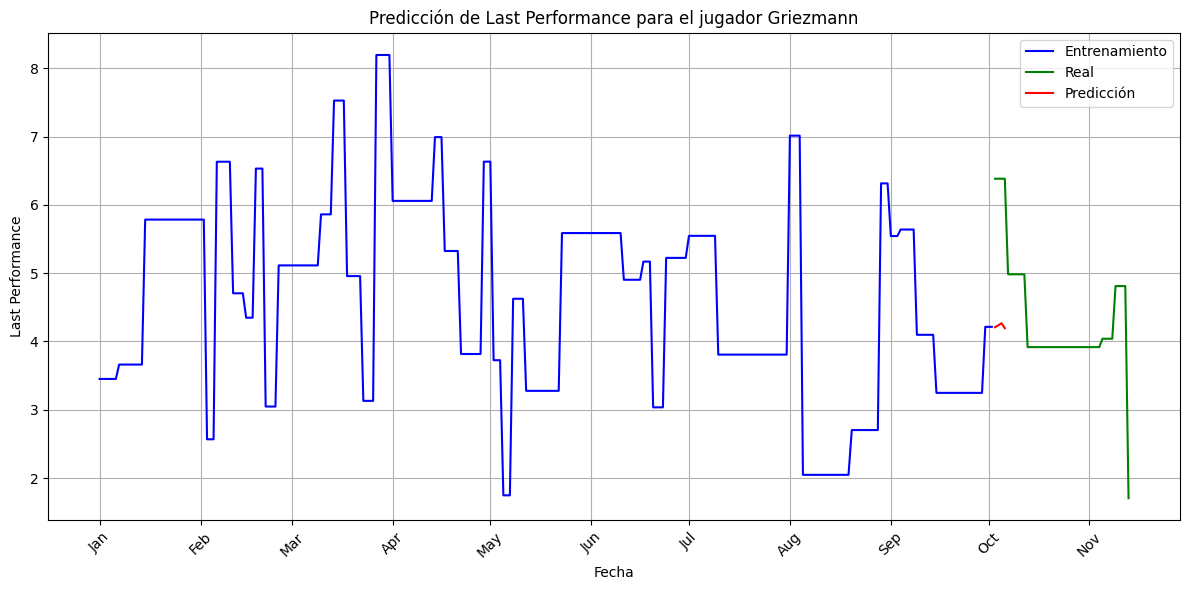

279 285


c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: Value

279
[3.451360585513066, 3.4513493468727443, 3.451339819457432, 3.451332003262391, 3.451325898283665, 3.451321504518216, 3.4513130173723368, 3.45129743227269, 3.6613799153322453, 3.6607549926077154, 3.6601357697359846, 3.65952223045872, 3.8689494614510926, 3.8683472411842903, 3.8677506566306747, 3.8671596921263034, 3.866574332154815, 3.865994561347002, 3.8653793324421266, 3.8645722626216323, 3.8630311731020774, 3.861294908799374, 3.859570013179519, 3.857856440953627, 4.065252045330334, 4.063560985213799, 4.061881114403734, 5.7663892973375654, 5.74904615929034, 5.731749658218029, 2.5401208361527643, 2.5114955013288784, 2.547296699775564, 2.5201328134785035, 2.4936854159575197, 6.515876951887925, 6.413395776113636, 6.302677758109548, 6.194665072737073, 4.406047918267783, 4.320396148601968, 4.237717381516678, 4.563962746533042, 4.483701146144987, 4.549499570350188, 6.406279584015205, 6.283709254022633, 5.655760536612982, 5.539765355489754, 5.175714742295341, 5.063954238555157, 4.8035855420

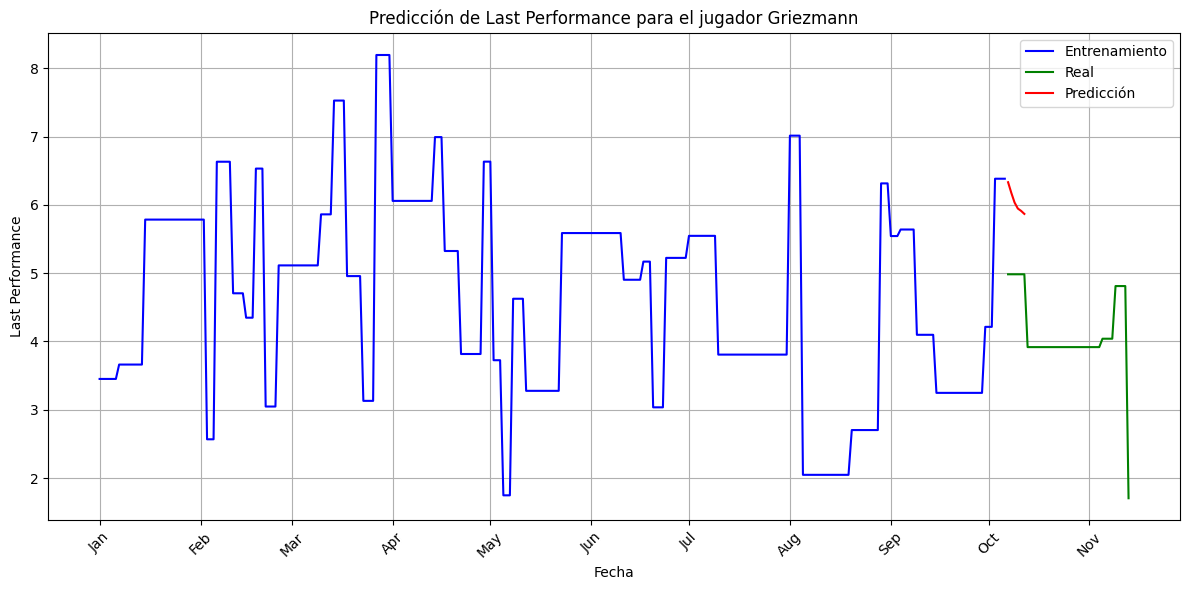

285 308


c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: Value

302
[3.451360585513066, 3.4513493468727443, 3.451339819457432, 3.451332003262391, 3.451325898283665, 3.451321504518216, 3.4513130173723368, 3.45129743227269, 3.6613799153322453, 3.6607549926077154, 3.6601357697359846, 3.65952223045872, 3.8689494614510926, 3.8683472411842903, 3.8677506566306747, 3.8671596921263034, 3.866574332154815, 3.865994561347002, 3.8653793324421266, 3.8645722626216323, 3.8630311731020774, 3.861294908799374, 3.859570013179519, 3.857856440953627, 4.065252045330334, 4.063560985213799, 4.061881114403734, 5.7663892973375654, 5.74904615929034, 5.731749658218029, 2.5401208361527643, 2.5114955013288784, 2.547296699775564, 2.5201328134785035, 2.4936854159575197, 6.515876951887925, 6.413395776113636, 6.302677758109548, 6.194665072737073, 4.406047918267783, 4.320396148601968, 4.237717381516678, 4.563962746533042, 4.483701146144987, 4.549499570350188, 6.406279584015205, 6.283709254022633, 5.655760536612982, 5.539765355489754, 5.175714742295341, 5.063954238555157, 4.8035855420

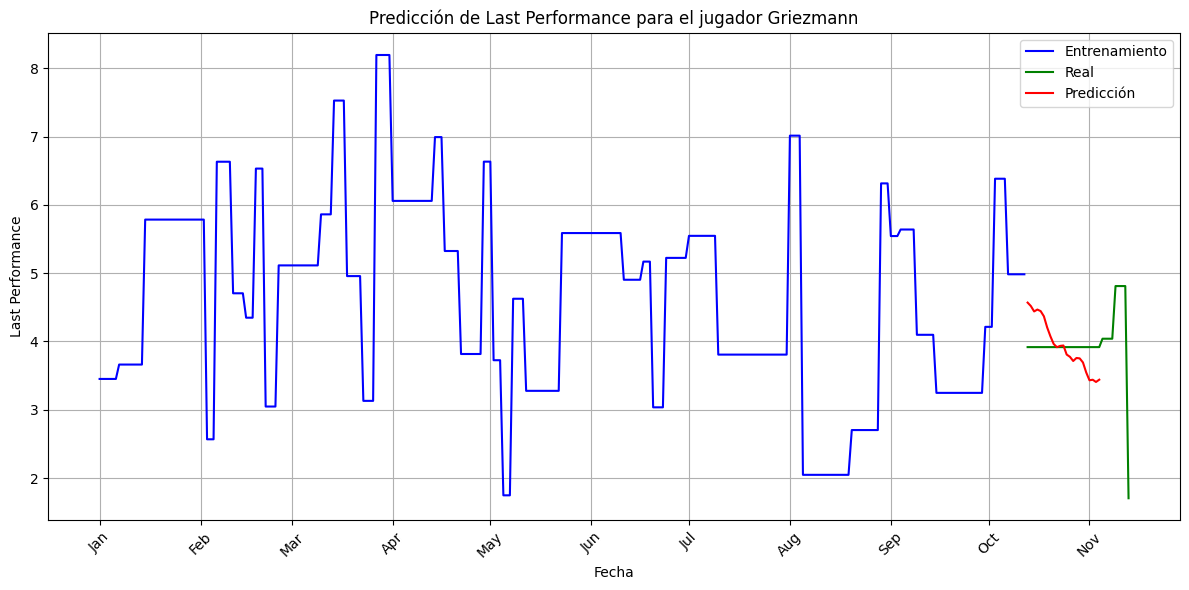

308 312


c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.p

306
[3.451360585513066, 3.4513493468727443, 3.451339819457432, 3.451332003262391, 3.451325898283665, 3.451321504518216, 3.4513130173723368, 3.45129743227269, 3.6613799153322453, 3.6607549926077154, 3.6601357697359846, 3.65952223045872, 3.8689494614510926, 3.8683472411842903, 3.8677506566306747, 3.8671596921263034, 3.866574332154815, 3.865994561347002, 3.8653793324421266, 3.8645722626216323, 3.8630311731020774, 3.861294908799374, 3.859570013179519, 3.857856440953627, 4.065252045330334, 4.063560985213799, 4.061881114403734, 5.7663892973375654, 5.74904615929034, 5.731749658218029, 2.5401208361527643, 2.5114955013288784, 2.547296699775564, 2.5201328134785035, 2.4936854159575197, 6.515876951887925, 6.413395776113636, 6.302677758109548, 6.194665072737073, 4.406047918267783, 4.320396148601968, 4.237717381516678, 4.563962746533042, 4.483701146144987, 4.549499570350188, 6.406279584015205, 6.283709254022633, 5.655760536612982, 5.539765355489754, 5.175714742295341, 5.063954238555157, 4.8035855420

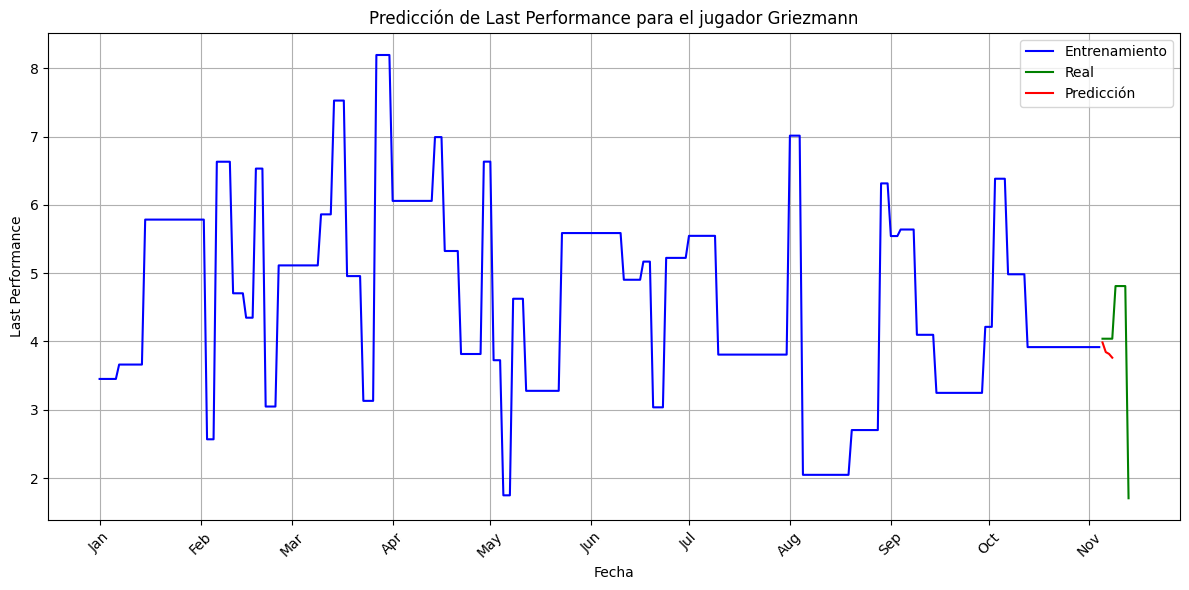

312 316


c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\oscac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.p

310
[3.451360585513066, 3.4513493468727443, 3.451339819457432, 3.451332003262391, 3.451325898283665, 3.451321504518216, 3.4513130173723368, 3.45129743227269, 3.6613799153322453, 3.6607549926077154, 3.6601357697359846, 3.65952223045872, 3.8689494614510926, 3.8683472411842903, 3.8677506566306747, 3.8671596921263034, 3.866574332154815, 3.865994561347002, 3.8653793324421266, 3.8645722626216323, 3.8630311731020774, 3.861294908799374, 3.859570013179519, 3.857856440953627, 4.065252045330334, 4.063560985213799, 4.061881114403734, 5.7663892973375654, 5.74904615929034, 5.731749658218029, 2.5401208361527643, 2.5114955013288784, 2.547296699775564, 2.5201328134785035, 2.4936854159575197, 6.515876951887925, 6.413395776113636, 6.302677758109548, 6.194665072737073, 4.406047918267783, 4.320396148601968, 4.237717381516678, 4.563962746533042, 4.483701146144987, 4.549499570350188, 6.406279584015205, 6.283709254022633, 5.655760536612982, 5.539765355489754, 5.175714742295341, 5.063954238555157, 4.8035855420

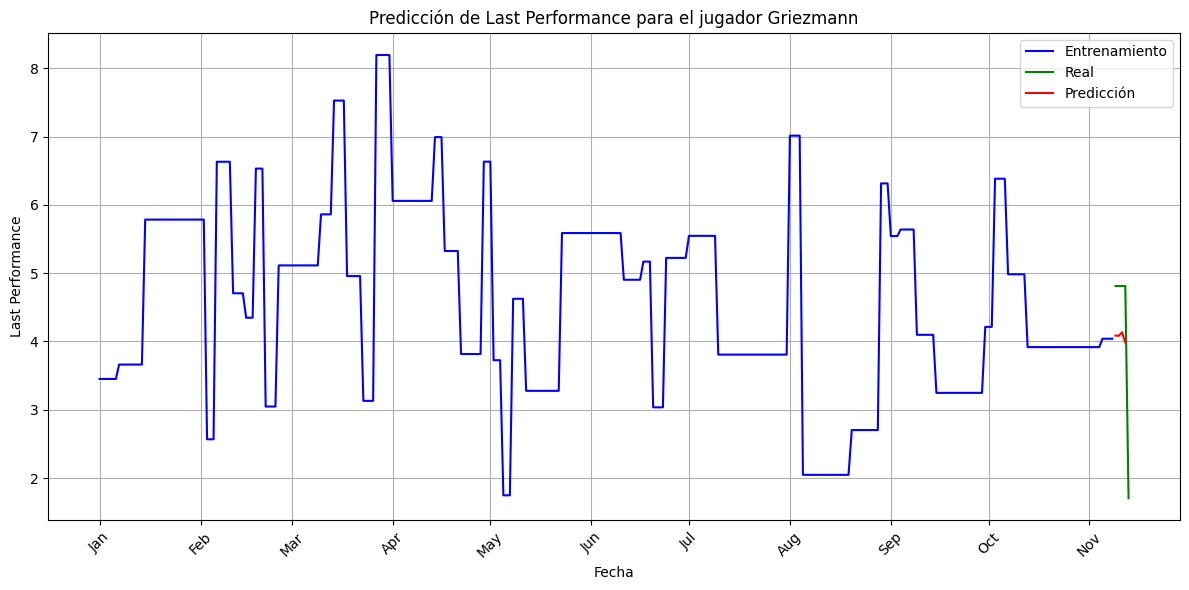

In [102]:
jugador = 'Griezmann'
df_jugador = df[df['Player'] == jugador]

serie_y = df_jugador['last_performance']
serie_exogena = df_jugador['Sentimientos_acumulado']

change_indices = calculate_change_indices(df_jugador)

total_predictions = []
total_errors = []

for i in range(len(change_indices)-1):
    day = change_indices[i]
    next_day = change_indices[i+1]

    train_data = df_jugador.iloc[:day]
    test_data = df_jugador.iloc[day:]
    
    days_to_next_change = next_day - day
    print(day, next_day)
    modelo = SARIMAX(train_data['last_performance'], 
                        exog=train_data['Sentimientos_acumulado'],
                        order=(1,0,1), seasonal_order=(1,0,1,12))

    resultado = modelo.fit()
    # Predecir los siguientes 7 días desde el último día de entrenamiento
    # predicciones = resultado.predict(start=day, end=day+6 if len(test_data) >= 7 else len(df_jugador)-1,
    #                                 exog=test_data['Sentimientos_acumulado'][:7] if len(test_data) >= 7 else test_data['Sentimientos_acumulado'], dynamic=False)
    
    predicciones = resultado.predict(start=day, end=next_day-1,
                                    exog=test_data['Sentimientos_acumulado'][:days_to_next_change], dynamic=False)
    
    
    total_predictions.extend(predicciones)
    total_errors.append(abs(predicciones.iloc[0] - test_data['last_performance'].iloc[0]))
    print(len(total_predictions))
    print(total_predictions)
    # mse = mean_squared_error(train_data['last_performance'], predicciones)
    # print(f"Error cuadrático medio: {mse}")
    
    # Graficar
    plt.figure(figsize=(12, 6))
    plt.plot(train_data['Fecha'], train_data['last_performance'], label='Entrenamiento', color='blue')
    plt.plot(test_data['Fecha'], test_data['last_performance'], label='Real', color='green')
    plt.plot(test_data['Fecha'][:days_to_next_change], predicciones, label='Predicción', color='red')

    plt.title(f'Predicción de Last Performance para el jugador {jugador}')
    plt.xlabel('Fecha')
    plt.ylabel('Last Performance')
    plt.legend()
    plt.grid(True)

    # Configurar el eje X para mostrar solo el nombre del mes
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))  # Un mes por etiqueta
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))  # Mostrar solo el nombre del mes (Ene, Feb, etc.)

    # Rotar las etiquetas del eje X para mayor legibilidad
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()
        

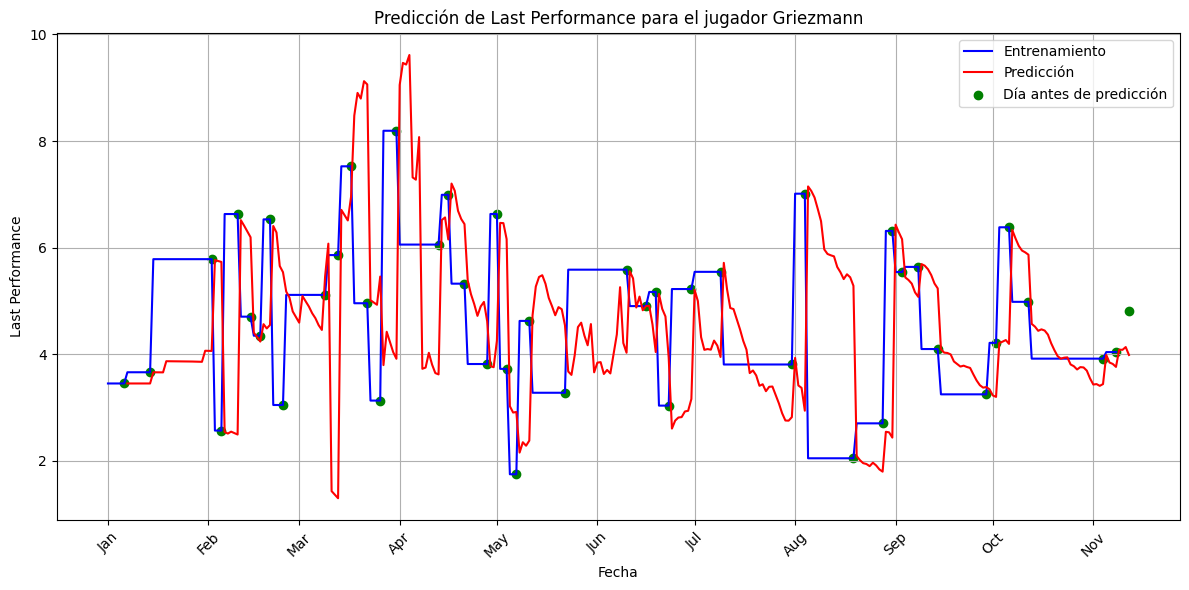

In [111]:
plt.figure(figsize=(12, 6))
plt.plot(train_data['Fecha'], train_data['last_performance'], label='Entrenamiento', color='blue')
plt.plot(df_jugador['Fecha'][change_indices[0]:len(df_jugador)-1], total_predictions, label='Predicción', color='red')
plt.scatter(df_jugador.iloc[np.array(change_indices) - 1]['Fecha'], df_jugador.iloc[np.array(change_indices) - 1]['last_performance'], color='green', label='Día antes de predicción')
plt.title(f'Predicción de Last Performance para el jugador {jugador}')
plt.xlabel('Fecha')
plt.ylabel('Last Performance')
plt.legend()
plt.grid(True)

# Configurar el eje X para mostrar solo el nombre del mes
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))  # Un mes por etiqueta
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))  # Mostrar solo el nombre del mes (Ene, Feb, etc.)

# Rotar las etiquetas del eje X para mayor legibilidad
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [113]:
# Obtener media, desviacion, mninimo y maximo de los errores
mean_error = np.mean(total_errors)
std_error = np.std(total_errors)
min_error = np.min(total_errors)
max_error = np.max(total_errors)
median = np.median(total_errors)

print(f"Mean error: {mean_error}")
print(f"Std error: {std_error}")
print(f"Min error: {min_error}")
print(f"Max error: {max_error}")
print(f"Median error: {median}")
print(f"Performance maximas: {df_jugador['last_performance'].max()}")
print(f"Performance minimas: {df_jugador['last_performance'].min()}")

Mean error: 1.7527051389790282
Std error: 1.2881608620307226
Min error: 0.05423211207748668
Max error: 5.100705447874656
Median error: 1.7022674534537776
Performance maximas: 8.193127664910962
Performance minimas: 1.7050413844996235


In [97]:
import numpy as np
np.array(change_indices) - 1

array([  5,  13,  32,  35,  40,  44,  47,  50,  54,  67,  71,  75,  80,
        84,  89, 102, 105, 110, 117, 120, 123, 126, 130, 141, 160, 166,
       169, 173, 180, 189, 211, 215, 230, 239, 242, 245, 250, 256, 271,
       274, 278, 284, 307, 311, 315])